In [1]:
!pip install yfinance

In [2]:
import yfinance as yf

üîÑ R√©cup√©ration des donn√©es pour PANW...
‚úÖ Donn√©es r√©cup√©r√©es pour PANW.

üìä Statistiques de Palo Alto Networks (PANW)
üìà Rendement Annuel : 27.51%
üìâ Volatilit√© Annuelle : 43.65%


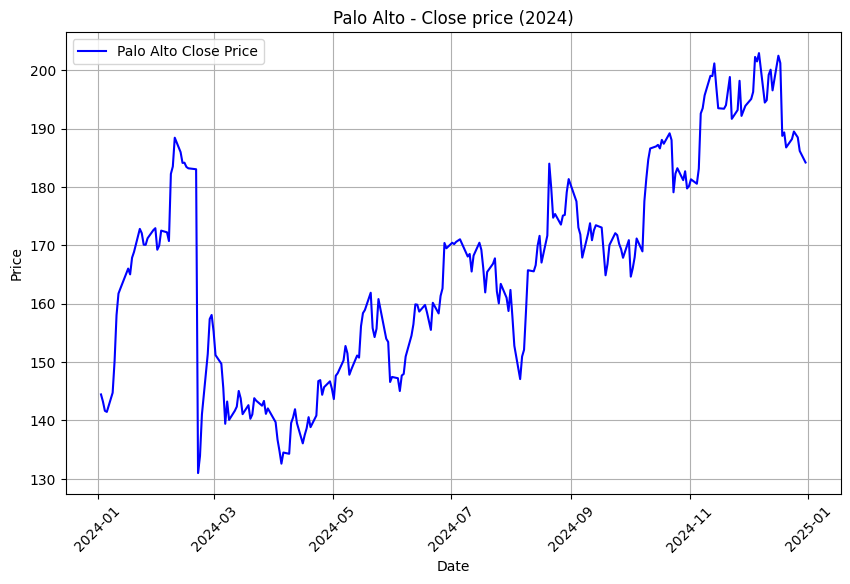

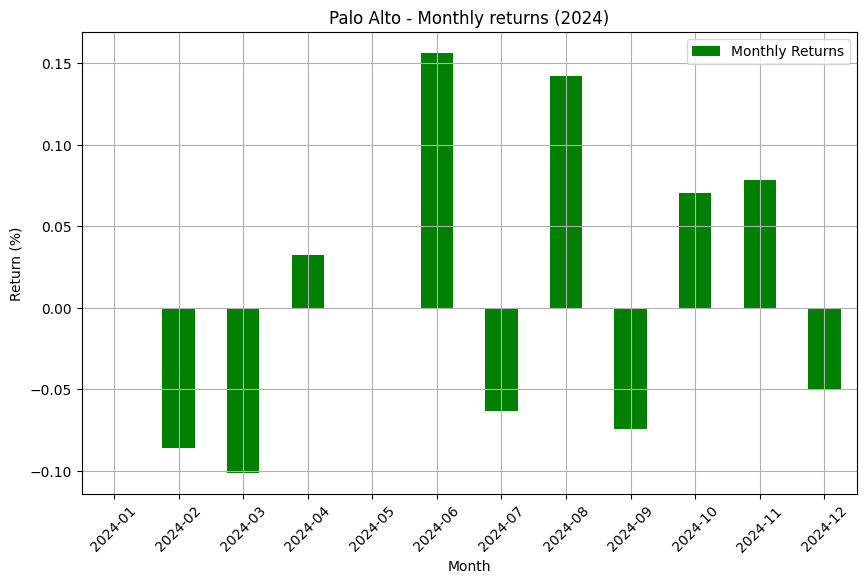

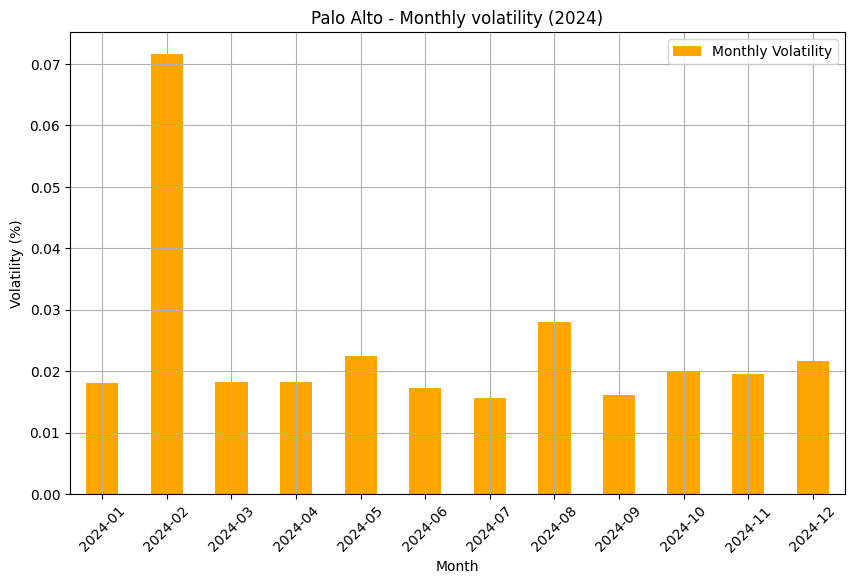

‚úÖ Donn√©es enregistr√©es dans 'PANW_historical_data.csv'.


In [4]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Define the time period
start_date = "2024-01-01"
end_date = "2024-12-31"

start_timestamp = int(pd.Timestamp(start_date).timestamp())  # Start date as UNIX timestamp
end_timestamp = int(pd.Timestamp(end_date).timestamp())  # End date as UNIX timestamp

# Yahoo Finance ticker for Palo Alto Networks
PANW_ticker = "PANW"

def fetch_data(ticker, start_timestamp, end_timestamp):
    """Downloads daily closing prices for a given asset"""
    print(f"üîÑ Fetching data for {ticker}...")

    url = f"https://query2.finance.yahoo.com/v8/finance/chart/{ticker}?period1={start_timestamp}&period2={end_timestamp}&interval=1d"

    try:
        response = requests.get(url, headers={"User-Agent": "Mozilla/5.0"})
        data = response.json()

        timestamps = data["chart"]["result"][0]["timestamp"]
        prices = data["chart"]["result"][0]["indicators"]["quote"][0]["close"]

        # Convert timestamps to DatetimeIndex
        dates = pd.to_datetime(timestamps, unit="s")
        price_series = pd.Series(prices, index=dates)

        print(f"‚úÖ Data successfully fetched for {ticker}.")
        return price_series

    except Exception as e:
        print(f"‚ùå Error fetching data for {ticker}: {e}")
        return None

# Fetch PANW data
PANW_prices = fetch_data(PANW_ticker, start_timestamp, end_timestamp)

if PANW_prices is not None:
    # Convert to DataFrame and ensure DatetimeIndex
    PANW_df = pd.DataFrame(PANW_prices, columns=["Close"])
    PANW_df.index = pd.to_datetime(PANW_df.index)
    PANW_df.index.name = "Date"

    # Calculate daily returns
    PANW_df["Daily Return"] = PANW_df["Close"].pct_change()

    # Calculate monthly returns and volatility
    monthly_returns = PANW_df["Close"].resample("ME").ffill().pct_change()
    monthly_volatility = PANW_df["Daily Return"].resample("ME").std()

    # Calculate annual return and volatility
    annual_return = PANW_df["Close"].iloc[-1] / PANW_df["Close"].iloc[0] - 1
    annual_volatility = PANW_df["Daily Return"].std() * (252**0.5)  # 252 trading days

    # Display results
    print("\nüìä Palo Alto Networks (PANW) Statistics")
    print(f"üìà Annual Return: {annual_return:.2%}")
    print(f"üìâ Annual Volatility: {annual_volatility:.2%}")

    # üìå Plot 1: Closing price
    plt.figure(figsize=(10, 6))
    plt.plot(PANW_df.index, PANW_df["Close"], label="Palo Alto Close Price", color="blue")
    plt.title("Palo Alto - Close Price (2024)")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()

    # üìå Plot 2: Monthly returns
    plt.figure(figsize=(10, 6))
    monthly_returns.index = monthly_returns.index.strftime('%Y-%m')
    monthly_returns.plot(kind='bar', color="green", label="Monthly Returns")
    plt.title("Palo Alto - Monthly Returns (2024)")
    plt.xlabel("Month")
    plt.ylabel("Return (%)")
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()

    # üìå Plot 3: Monthly volatility
    plt.figure(figsize=(10, 6))
    monthly_volatility.index = monthly_volatility.index.strftime('%Y-%m')
    monthly_volatility.plot(kind='bar', color="orange", label="Monthly Volatility")
    plt.title("Palo Alto - Monthly Volatility (2024)")
    plt.xlabel("Month")
    plt.ylabel("Volatility (%)")
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()

    # Save the data to CSV
    PANW_df.to_csv("PANW_historical_data.csv")
    print("‚úÖ Data saved to 'PANW_historical_data.csv'.")

else:
    print("‚ö†Ô∏è No data available for Palo Alto.")

üîÑ R√©cup√©ration des donn√©es pour CRWD...
‚úÖ Donn√©es r√©cup√©r√©es pour CRWD.

üìä Statistiques de Crowd Strike (CRWD)
üìà Rendement Annuel : 41.48%
üìâ Volatilit√© Annuelle : 47.20%


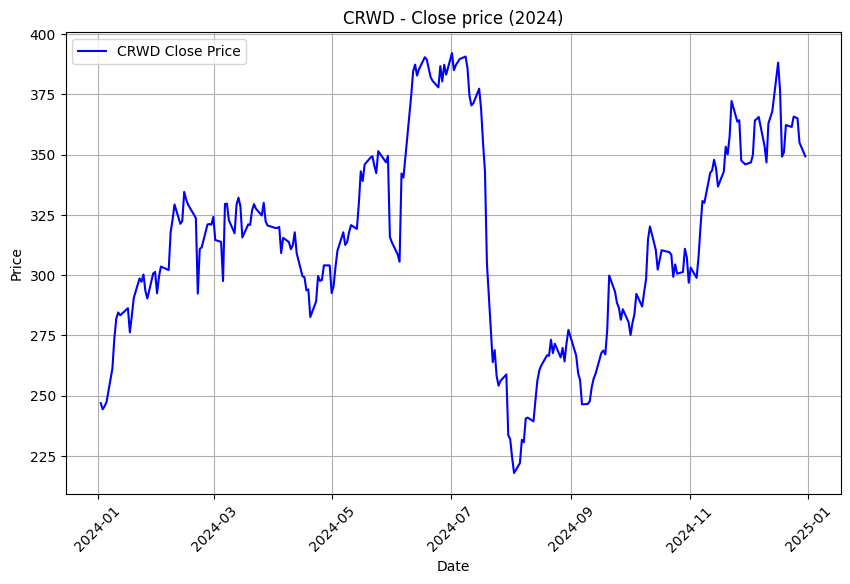

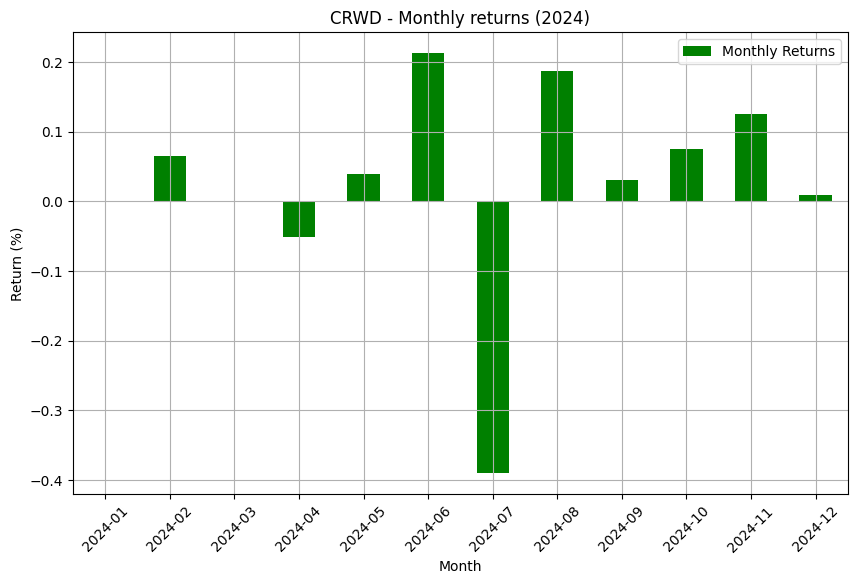

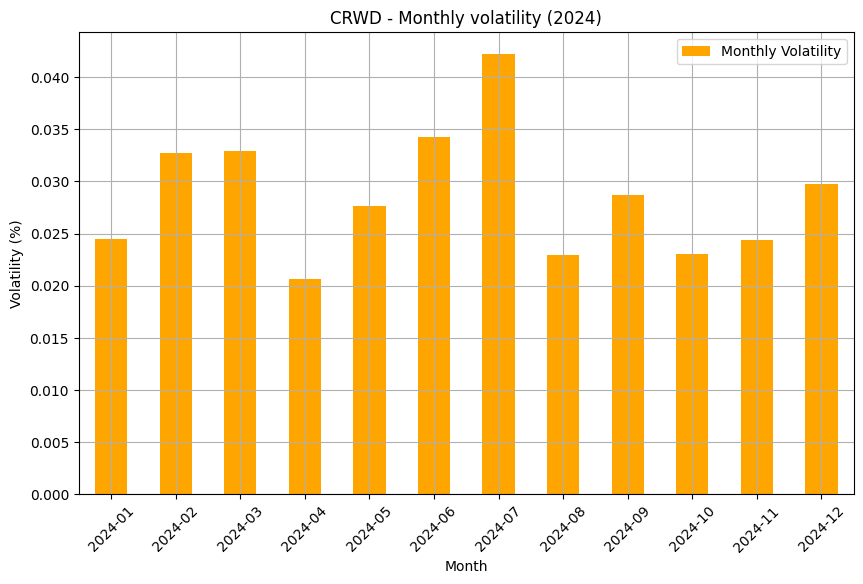

‚úÖ Donn√©es enregistr√©es dans 'CRWD_historical_data.csv'.


In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Define the time period
start_date = "2024-01-01"
end_date = "2024-12-31"

start_timestamp = int(pd.Timestamp(start_date).timestamp())  # Start as UNIX timestamp
end_timestamp = int(pd.Timestamp(end_date).timestamp())  # End as UNIX timestamp

# Yahoo Finance ticker for CrowdStrike
CRWD_ticker = "CRWD"

def fetch_data(ticker, start_timestamp, end_timestamp):
    """Download daily closing prices for a given asset"""
    print(f"üîÑ Fetching data for {ticker}...")

    url = f"https://query2.finance.yahoo.com/v8/finance/chart/{ticker}?period1={start_timestamp}&period2={end_timestamp}&interval=1d"

    try:
        response = requests.get(url, headers={"User-Agent": "Mozilla/5.0"})
        data = response.json()

        timestamps = data["chart"]["result"][0]["timestamp"]
        prices = data["chart"]["result"][0]["indicators"]["quote"][0]["close"]

        # Convert timestamps to DatetimeIndex
        dates = pd.to_datetime(timestamps, unit="s")
        price_series = pd.Series(prices, index=dates)

        print(f"‚úÖ Data successfully fetched for {ticker}.")
        return price_series

    except Exception as e:
        print(f"‚ùå Error while fetching data for {ticker}: {e}")
        return None

# Fetch CRWD data
CRWD_prices = fetch_data(CRWD_ticker, start_timestamp, end_timestamp)

if CRWD_prices is not None:
    # Convert to DataFrame and ensure proper datetime index
    CRWD_df = pd.DataFrame(CRWD_prices, columns=["Close"])
    CRWD_df.index = pd.to_datetime(CRWD_df.index)
    CRWD_df.index.name = "Date"

    # Calculate daily returns
    CRWD_df["Daily Return"] = CRWD_df["Close"].pct_change()

    # Calculate monthly returns and volatility
    monthly_returns = CRWD_df["Close"].resample("ME").ffill().pct_change()
    monthly_volatility = CRWD_df["Daily Return"].resample("ME").std()

    # Calculate annual return and volatility
    annual_return = CRWD_df["Close"].iloc[-1] / CRWD_df["Close"].iloc[0] - 1
    annual_volatility = CRWD_df["Daily Return"].std() * (252**0.5)  # 252 trading days per year

    # Display results
    print("\nüìä CrowdStrike (CRWD) Statistics")
    print(f"üìà Annual Return: {annual_return:.2%}")
    print(f"üìâ Annual Volatility: {annual_volatility:.2%}")

    # üìå Plot 1: Closing price
    plt.figure(figsize=(10, 6))
    plt.plot(CRWD_df.index, CRWD_df["Close"], label="CRWD Close Price", color="blue")
    plt.title("CRWD - Close Price (2024)")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()

    # üìå Plot 2: Monthly returns
    plt.figure(figsize=(10, 6))
    monthly_returns.index = monthly_returns.index.strftime('%Y-%m')
    monthly_returns.plot(kind='bar', color="green", label="Monthly Returns")
    plt.title("CRWD - Monthly Returns (2024)")
    plt.xlabel("Month")
    plt.ylabel("Return (%)")
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()

    # üìå Plot 3: Monthly volatility
    plt.figure(figsize=(10, 6))
    monthly_volatility.index = monthly_volatility.index.strftime('%Y-%m')
    monthly_volatility.plot(kind='bar', color="orange", label="Monthly Volatility")
    plt.title("CRWD - Monthly Volatility (2024)")
    plt.xlabel("Month")
    plt.ylabel("Volatility (%)")
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()

    # Save data to CSV
    CRWD_df.to_csv("CRWD_historical_data.csv")
    print("‚úÖ Data saved to 'CRWD_historical_data.csv'.")

else:
    print("‚ö†Ô∏è No data available for CRWD.")

üîÑ R√©cup√©ration des donn√©es pour NVDA...
‚úÖ Donn√©es r√©cup√©r√©es pour NVDA.

üìä Statistiques de Nvidia (NVDA)
üìà Rendement Annuel : 185.44%
üìâ Volatilit√© Annuelle : 52.54%


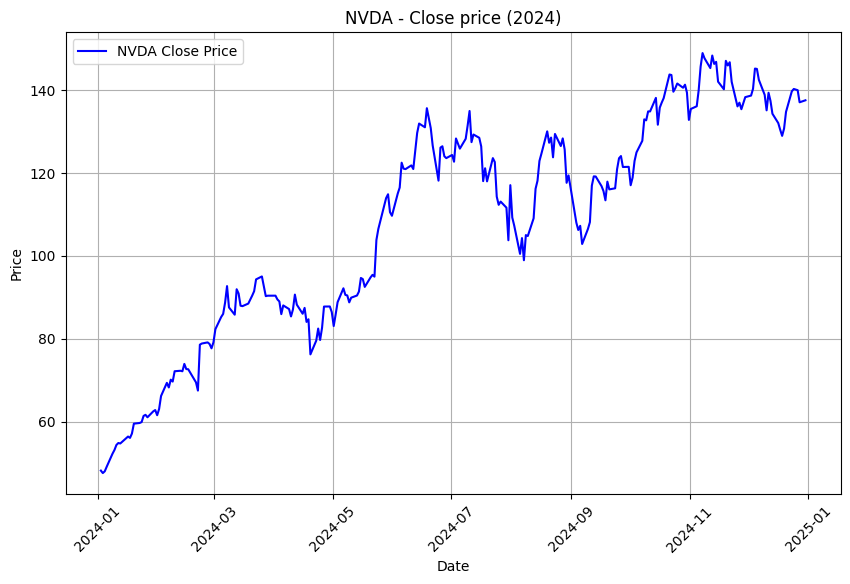

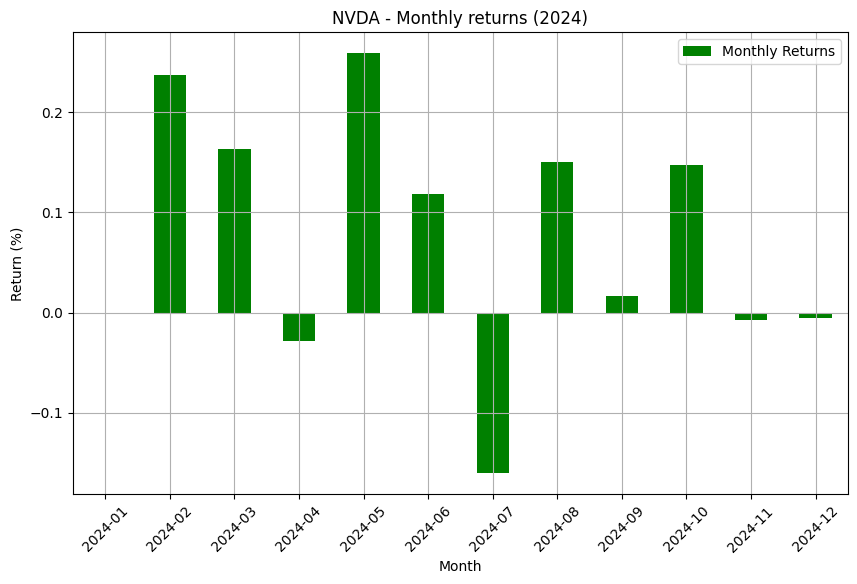

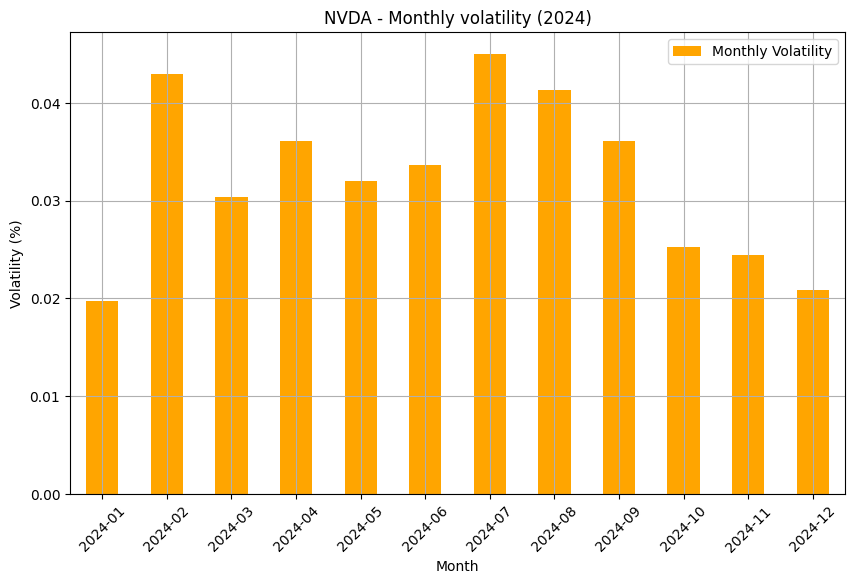

‚úÖ Donn√©es enregistr√©es dans 'NVDA_historical_data.csv'.


In [4]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Define the analysis period
start_date = "2024-01-01"
end_date = "2024-12-31"

start_timestamp = int(pd.Timestamp(start_date).timestamp())  # Start date in UNIX timestamp
end_timestamp = int(pd.Timestamp(end_date).timestamp())      # End date in UNIX timestamp

# Yahoo Finance ticker for NVIDIA
NVDA_ticker = "NVDA"

def fetch_data(ticker, start_timestamp, end_timestamp):
    """Fetch closing prices for a given asset in a single request"""
    print(f"üîÑ Fetching data for {ticker}...")

    url = f"https://query2.finance.yahoo.com/v8/finance/chart/{ticker}?period1={start_timestamp}&period2={end_timestamp}&interval=1d"

    try:
        response = requests.get(url, headers={"User-Agent": "Mozilla/5.0"})
        data = response.json()

        timestamps = data["chart"]["result"][0]["timestamp"]
        prices = data["chart"]["result"][0]["indicators"]["quote"][0]["close"]

        # Convert timestamps to DatetimeIndex
        dates = pd.to_datetime(timestamps, unit="s")
        price_series = pd.Series(prices, index=dates)

        print(f"‚úÖ Data successfully fetched for {ticker}.")
        return price_series

    except Exception as e:
        print(f"‚ùå Error fetching data for {ticker}: {e}")
        return None

# Fetch NVDA data
NVDA_prices = fetch_data(NVDA_ticker, start_timestamp, end_timestamp)

if NVDA_prices is not None:
    # Convert to DataFrame and set DatetimeIndex
    NVDA_df = pd.DataFrame(NVDA_prices, columns=["Close"])
    NVDA_df.index = pd.to_datetime(NVDA_df.index)
    NVDA_df.index.name = "Date"

    # Compute daily returns
    NVDA_df["Daily Return"] = NVDA_df["Close"].pct_change()

    # Compute monthly returns and volatility
    monthly_returns = NVDA_df["Close"].resample("ME").ffill().pct_change()
    monthly_volatility = NVDA_df["Daily Return"].resample("ME").std()

    # Compute annual return and volatility
    annual_return = NVDA_df["Close"].iloc[-1] / NVDA_df["Close"].iloc[0] - 1
    annual_volatility = NVDA_df["Daily Return"].std() * (252**0.5)  # Approx. 252 trading days/year

    # Display results
    print("\nüìä NVIDIA (NVDA) Performance Statistics")
    print(f"üìà Annual Return: {annual_return:.2%}")
    print(f"üìâ Annual Volatility: {annual_volatility:.2%}")

    # üìå Plot 1: Closing price
    plt.figure(figsize=(10, 6))
    plt.plot(NVDA_df.index, NVDA_df["Close"], label="NVDA Close Price", color="blue")
    plt.title("NVIDIA - Closing Price (2024)")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()

    # üìå Plot 2: Monthly returns
    plt.figure(figsize=(10, 6))
    monthly_returns.index = monthly_returns.index.strftime('%Y-%m')
    monthly_returns.plot(kind='bar', color="green", label="Monthly Returns")
    plt.title("NVIDIA - Monthly Returns (2024)")
    plt.xlabel("Month")
    plt.ylabel("Return (%)")
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()

    # üìå Plot 3: Monthly volatility
    plt.figure(figsize=(10, 6))
    monthly_volatility.index = monthly_volatility.index.strftime('%Y-%m')
    monthly_volatility.plot(kind='bar', color="orange", label="Monthly Volatility")
    plt.title("NVIDIA - Monthly Volatility (2024)")
    plt.xlabel("Month")
    plt.ylabel("Volatility (%)")
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()

    # Save data to CSV
    NVDA_df.to_csv("NVDA_historical_data.csv")
    print("‚úÖ Data saved to 'NVDA_historical_data.csv'.")

else:
    print("‚ö†Ô∏è No data available for NVDA.")

üîÑ R√©cup√©ration des donn√©es pour PLTR...
‚úÖ Donn√©es r√©cup√©r√©es pour PLTR.

üìä Statistiques de Palantir (PLTR)
üìà Rendement Annuel : 365.50%
üìâ Volatilit√© Annuelle : 64.31%


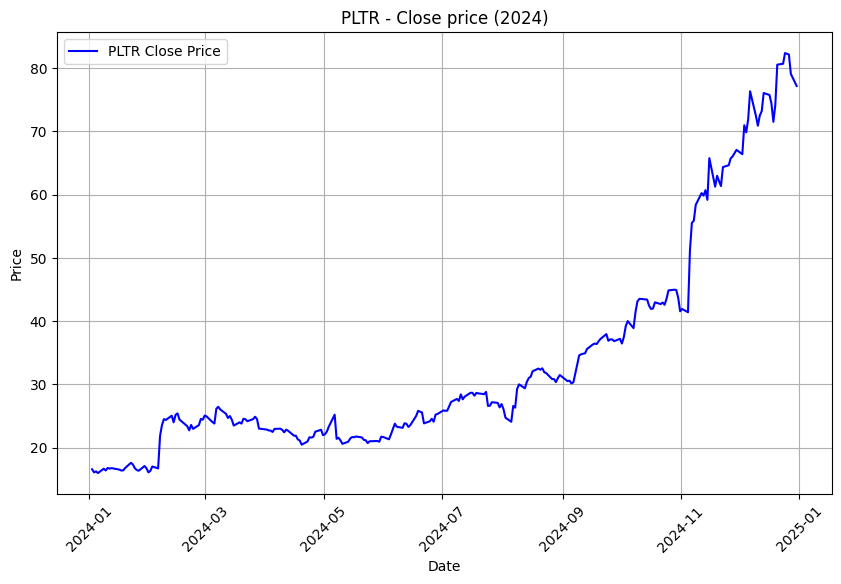

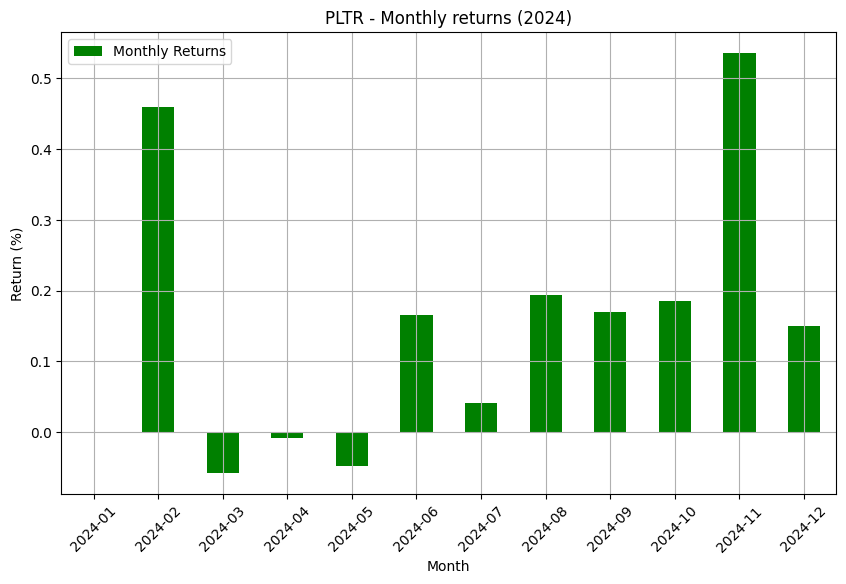

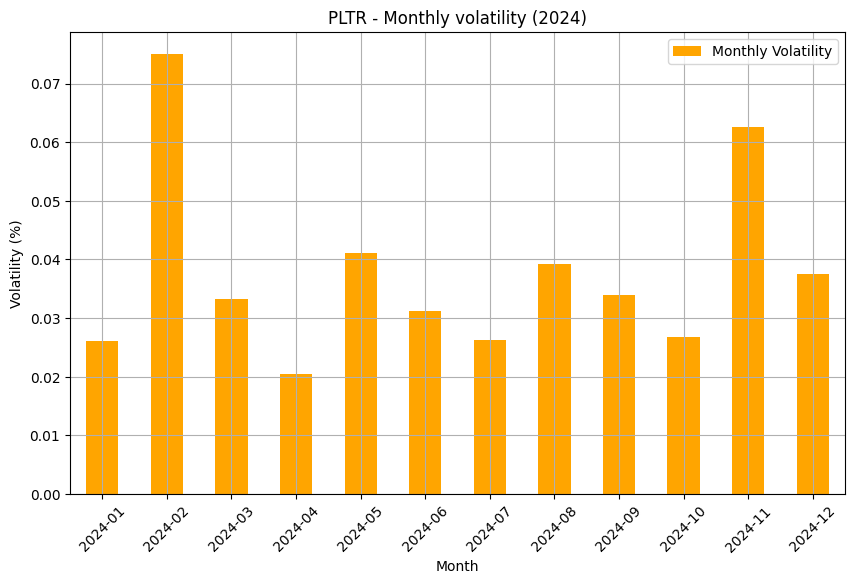

‚úÖ Donn√©es enregistr√©es dans 'PLTR_historical_data.csv'.


In [5]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Define the analysis period
start_date = "2024-01-01"
end_date = "2024-12-31"

start_timestamp = int(pd.Timestamp(start_date).timestamp())  # Start date as UNIX timestamp
end_timestamp = int(pd.Timestamp(end_date).timestamp())      # End date as UNIX timestamp

# Yahoo Finance ticker for Palantir
PLTR_ticker = "PLTR"

def fetch_data(ticker, start_timestamp, end_timestamp):
    """Fetches daily closing prices for a given asset"""
    print(f"üîÑ Fetching data for {ticker}...")

    url = f"https://query2.finance.yahoo.com/v8/finance/chart/{ticker}?period1={start_timestamp}&period2={end_timestamp}&interval=1d"
    
    try:
        response = requests.get(url, headers={"User-Agent": "Mozilla/5.0"})
        data = response.json()

        timestamps = data["chart"]["result"][0]["timestamp"]
        prices = data["chart"]["result"][0]["indicators"]["quote"][0]["close"]

        # Convert timestamps to DatetimeIndex
        dates = pd.to_datetime(timestamps, unit="s")
        price_series = pd.Series(prices, index=dates)

        print(f"‚úÖ Data successfully fetched for {ticker}.")
        return price_series

    except Exception as e:
        print(f"‚ùå Error fetching data for {ticker}: {e}")
        return None

# Fetch PLTR data
PLTR_prices = fetch_data(PLTR_ticker, start_timestamp, end_timestamp)

if PLTR_prices is not None:
    # Convert to DataFrame and set index to DatetimeIndex
    PLTR_df = pd.DataFrame(PLTR_prices, columns=["Close"])
    PLTR_df.index = pd.to_datetime(PLTR_df.index)
    PLTR_df.index.name = "Date"

    # Compute daily returns
    PLTR_df["Daily Return"] = PLTR_df["Close"].pct_change()

    # Compute monthly returns and volatility
    monthly_returns = PLTR_df["Close"].resample("ME").ffill().pct_change()
    monthly_volatility = PLTR_df["Daily Return"].resample("ME").std()

    # Compute annual return and volatility
    annual_return = PLTR_df["Close"].iloc[-1] / PLTR_df["Close"].iloc[0] - 1
    annual_volatility = PLTR_df["Daily Return"].std() * (252**0.5)  # 252 trading days

    # Display results
    print("\nüìä Palantir (PLTR) Performance Statistics")
    print(f"üìà Annual Return: {annual_return:.2%}")
    print(f"üìâ Annual Volatility: {annual_volatility:.2%}")

    # üìå Plot 1: Closing price
    plt.figure(figsize=(10, 6))
    plt.plot(PLTR_df.index, PLTR_df["Close"], label="PLTR Close Price", color="blue")
    plt.title("Palantir - Closing Price (2024)")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()

    # üìå Plot 2: Monthly returns
    plt.figure(figsize=(10, 6))
    monthly_returns.index = monthly_returns.index.strftime('%Y-%m')
    monthly_returns.plot(kind='bar', color="green", label="Monthly Returns")
    plt.title("Palantir - Monthly Returns (2024)")
    plt.xlabel("Month")
    plt.ylabel("Return (%)")
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()

    # üìå Plot 3: Monthly volatility
    plt.figure(figsize=(10, 6))
    monthly_volatility.index = monthly_volatility.index.strftime('%Y-%m')
    monthly_volatility.plot(kind='bar', color="orange", label="Monthly Volatility")
    plt.title("Palantir - Monthly Volatility (2024)")
    plt.xlabel("Month")
    plt.ylabel("Volatility (%)")
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()

    # Save data to CSV
    PLTR_df.to_csv("PLTR_historical_data.csv")
    print("‚úÖ Data saved to 'PLTR_historical_data.csv'.")

else:
    print("‚ö†Ô∏è No data available for PLTR.")

üîÑ R√©cup√©ration des donn√©es pour EURUSD=X...
‚úÖ Donn√©es r√©cup√©r√©es pour EURUSD=X.

üìä Statistiques de EUR/USD (EURUSD=X)
üìà Rendement Annuel : 6.05%
üìâ Volatilit√© Annuelle : 5.82%


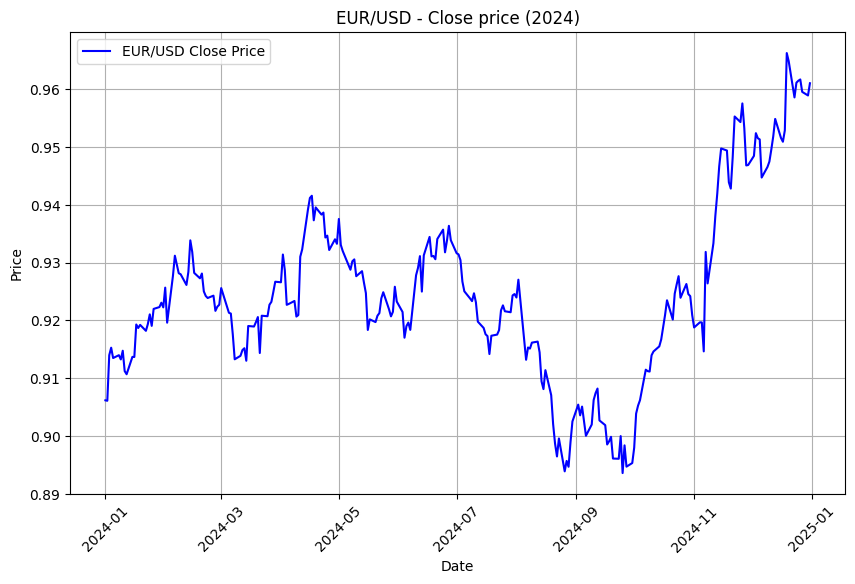

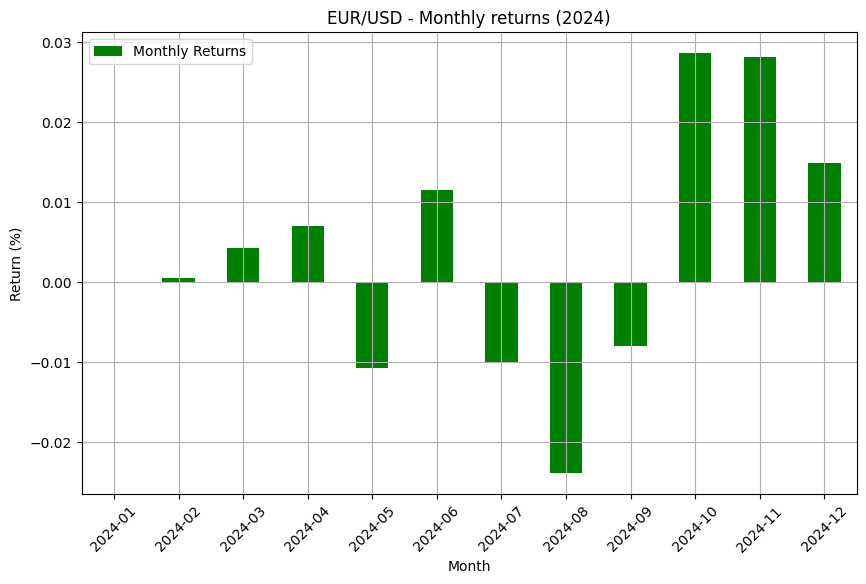

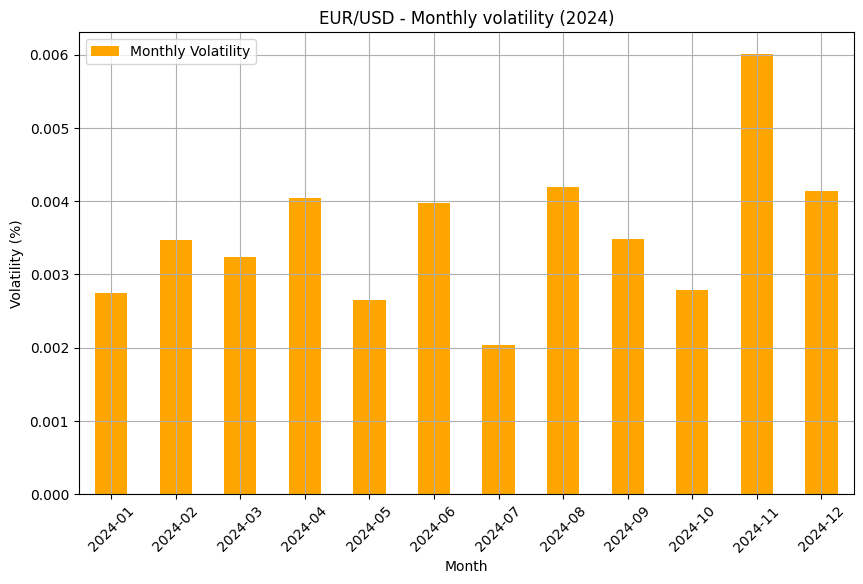

‚úÖ Donn√©es enregistr√©es dans 'EURUSD_historical_data.csv'.


In [7]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Define the analysis period
start_date = "2024-01-01"
end_date = "2024-12-31"

start_timestamp = int(pd.Timestamp(start_date).timestamp())  # Start date as UNIX timestamp
end_timestamp = int(pd.Timestamp(end_date).timestamp())      # End date as UNIX timestamp

# Yahoo Finance ticker for EUR/USD exchange rate
EURUSD_ticker = "EURUSD=X"

def fetch_data(ticker, start_timestamp, end_timestamp):
    """Fetches closing prices for a given asset in a single request"""
    print(f"üîÑ Fetching data for {ticker}...")

    url = f"https://query2.finance.yahoo.com/v8/finance/chart/{ticker}?period1={start_timestamp}&period2={end_timestamp}&interval=1d"
    
    try:
        response = requests.get(url, headers={"User-Agent": "Mozilla/5.0"})
        data = response.json()

        timestamps = data["chart"]["result"][0]["timestamp"]
        prices = data["chart"]["result"][0]["indicators"]["quote"][0]["close"]

        # Convert timestamps to DatetimeIndex
        dates = pd.to_datetime(timestamps, unit="s")
        price_series = pd.Series(prices, index=dates)

        print(f"‚úÖ Data successfully fetched for {ticker}.")
        return price_series

    except Exception as e:
        print(f"‚ùå Error while fetching data for {ticker}: {e}")
        return None

# Fetch EUR/USD data
EURUSD_prices = fetch_data(EURUSD_ticker, start_timestamp, end_timestamp)

if EURUSD_prices is not None:
    # Convert to DataFrame and ensure DatetimeIndex
    EURUSD_df = pd.DataFrame(EURUSD_prices, columns=["Close"])
    EURUSD_df.index = pd.to_datetime(EURUSD_df.index)
    EURUSD_df.index.name = "Date"

    # Calculate daily returns
    EURUSD_df["Daily Return"] = EURUSD_df["Close"].pct_change()

    # Calculate monthly returns and volatility
    monthly_returns = EURUSD_df["Close"].resample("ME").ffill().pct_change()
    monthly_volatility = EURUSD_df["Daily Return"].resample("ME").std()

    # Calculate annual return and volatility
    annual_return = EURUSD_df["Close"].iloc[-1] / EURUSD_df["Close"].iloc[0] - 1
    annual_volatility = EURUSD_df["Daily Return"].std() * (252**0.5)  # Approx. 252 trading days/year

    # Display results
    print("\nüìä EUR/USD (EURUSD=X) Performance Statistics")
    print(f"üìà Annual Return: {annual_return:.2%}")
    print(f"üìâ Annual Volatility: {annual_volatility:.2%}")

    # üìå Plot 1: Closing price
    plt.figure(figsize=(10, 6))
    plt.plot(EURUSD_df.index, EURUSD_df["Close"], label="EUR/USD Close Price", color="blue")
    plt.title("EUR/USD - Closing Price (2024)")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()

    # üìå Plot 2: Monthly returns
    plt.figure(figsize=(10, 6))
    monthly_returns.index = monthly_returns.index.strftime('%Y-%m')
    monthly_returns.plot(kind='bar', color="green", label="Monthly Returns")
    plt.title("EUR/USD - Monthly Returns (2024)")
    plt.xlabel("Month")
    plt.ylabel("Return (%)")
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()

    # üìå Plot 3: Monthly volatility
    plt.figure(figsize=(10, 6))
    monthly_volatility.index = monthly_volatility.index.strftime('%Y-%m')
    monthly_volatility.plot(kind='bar', color="orange", label="Monthly Volatility")
    plt.title("EUR/USD - Monthly Volatility (2024)")
    plt.xlabel("Month")
    plt.ylabel("Volatility (%)")
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()

    # Save data to CSV
    EURUSD_df.to_csv("EURUSD_historical_data.csv")
    print("‚úÖ Data saved to 'EURUSD_historical_data.csv'.")

else:
    print("‚ö†Ô∏è No data available for EUR/USD.")

üîÑ R√©cup√©ration des donn√©es pour CHF=X...
‚úÖ Donn√©es r√©cup√©r√©es pour CHF=X.

üìä Statistiques de CHF (CHF=X)
üìà Rendement Annuel : 7.43%
üìâ Volatilit√© Annuelle : 7.04%


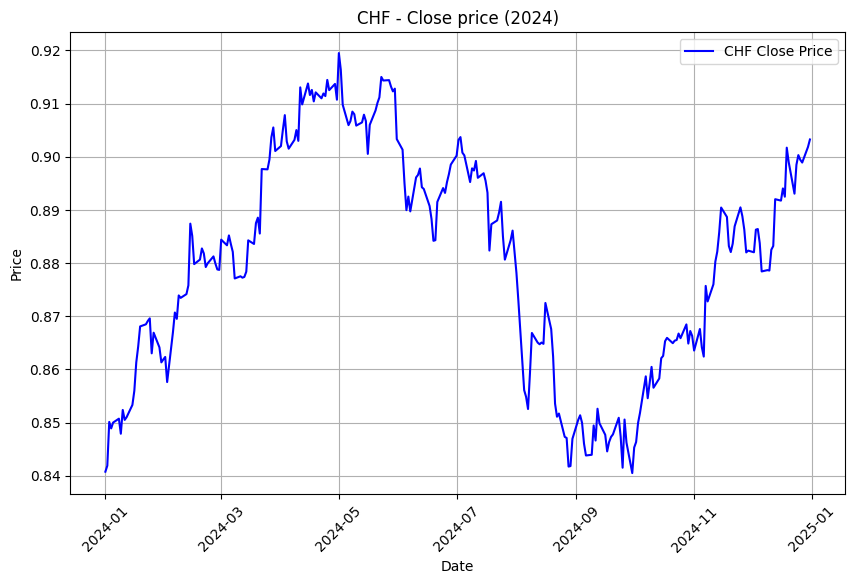

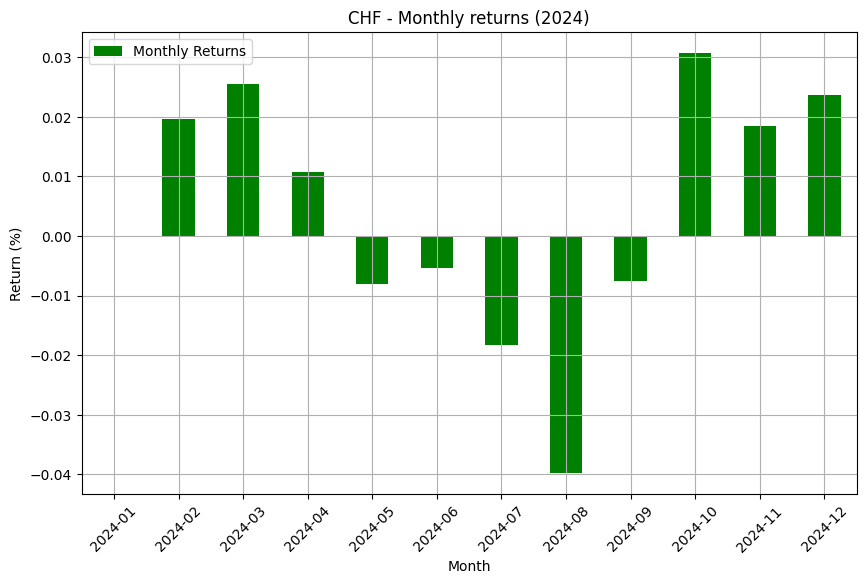

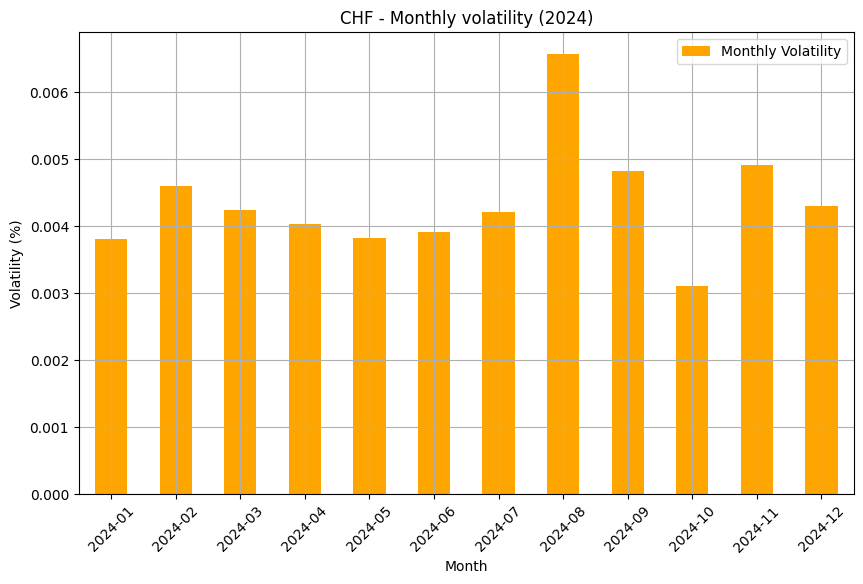

‚úÖ Donn√©es enregistr√©es dans 'CHF_historical_data.csv'.


In [8]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Define the analysis period
start_date = "2024-01-01"
end_date = "2024-12-31"

start_timestamp = int(pd.Timestamp(start_date).timestamp())  # Start date as UNIX timestamp
end_timestamp = int(pd.Timestamp(end_date).timestamp())      # End date as UNIX timestamp

# Yahoo Finance ticker for the Swiss Franc
CHF_ticker = "CHF=X"

def fetch_data(ticker, start_timestamp, end_timestamp):
    """Fetches daily closing prices for a given asset"""
    print(f"üîÑ Fetching data for {ticker}...")

    url = f"https://query2.finance.yahoo.com/v8/finance/chart/{ticker}?period1={start_timestamp}&period2={end_timestamp}&interval=1d"

    try:
        response = requests.get(url, headers={"User-Agent": "Mozilla/5.0"})
        data = response.json()

        timestamps = data["chart"]["result"][0]["timestamp"]
        prices = data["chart"]["result"][0]["indicators"]["quote"][0]["close"]

        # Convert timestamps to DatetimeIndex
        dates = pd.to_datetime(timestamps, unit="s")
        price_series = pd.Series(prices, index=dates)

        print(f"‚úÖ Data successfully fetched for {ticker}.")
        return price_series

    except Exception as e:
        print(f"‚ùå Error fetching data for {ticker}: {e}")
        return None

# Fetch CHF data
CHF_prices = fetch_data(CHF_ticker, start_timestamp, end_timestamp)

if CHF_prices is not None:
    # Convert to DataFrame and ensure DatetimeIndex
    CHF_df = pd.DataFrame(CHF_prices, columns=["Close"])
    CHF_df.index = pd.to_datetime(CHF_df.index)
    CHF_df.index.name = "Date"

    # Calculate daily returns
    CHF_df["Daily Return"] = CHF_df["Close"].pct_change()

    # Calculate monthly returns and volatility
    monthly_returns = CHF_df["Close"].resample("ME").ffill().pct_change()
    monthly_volatility = CHF_df["Daily Return"].resample("ME").std()

    # Calculate annual return and volatility
    annual_return = CHF_df["Close"].iloc[-1] / CHF_df["Close"].iloc[0] - 1
    annual_volatility = CHF_df["Daily Return"].std() * (252**0.5)  # Approx. 252 trading days/year

    # Display results
    print("\nüìä CHF (CHF=X) Performance Statistics")
    print(f"üìà Annual Return: {annual_return:.2%}")
    print(f"üìâ Annual Volatility: {annual_volatility:.2%}")

    # üìå Plot 1: Closing price
    plt.figure(figsize=(10, 6))
    plt.plot(CHF_df.index, CHF_df["Close"], label="CHF Close Price", color="blue")
    plt.title("CHF - Closing Price (2024)")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()

    # üìå Plot 2: Monthly returns
    plt.figure(figsize=(10, 6))
    monthly_returns.index = monthly_returns.index.strftime('%Y-%m')
    monthly_returns.plot(kind='bar', color="green", label="Monthly Returns")
    plt.title("CHF - Monthly Returns (2024)")
    plt.xlabel("Month")
    plt.ylabel("Return (%)")
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()

    # üìå Plot 3: Monthly volatility
    plt.figure(figsize=(10, 6))
    monthly_volatility.index = monthly_volatility.index.strftime('%Y-%m')
    monthly_volatility.plot(kind='bar', color="orange", label="Monthly Volatility")
    plt.title("CHF - Monthly Volatility (2024)")
    plt.xlabel("Month")
    plt.ylabel("Volatility (%)")
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()

    # Save data to CSV
    CHF_df.to_csv("CHF_historical_data.csv")
    print("‚úÖ Data saved to 'CHF_historical_data.csv'.")

else:
    print("‚ö†Ô∏è No data available for CHF.")

üîÑ R√©cup√©ration des donn√©es pour PL=F...
‚úÖ Donn√©es r√©cup√©r√©es pour PL=F.

üìä Statistiques de PL (PL=F)
üìà Rendement Annuel : -8.43%
üìâ Volatilit√© Annuelle : 26.39%


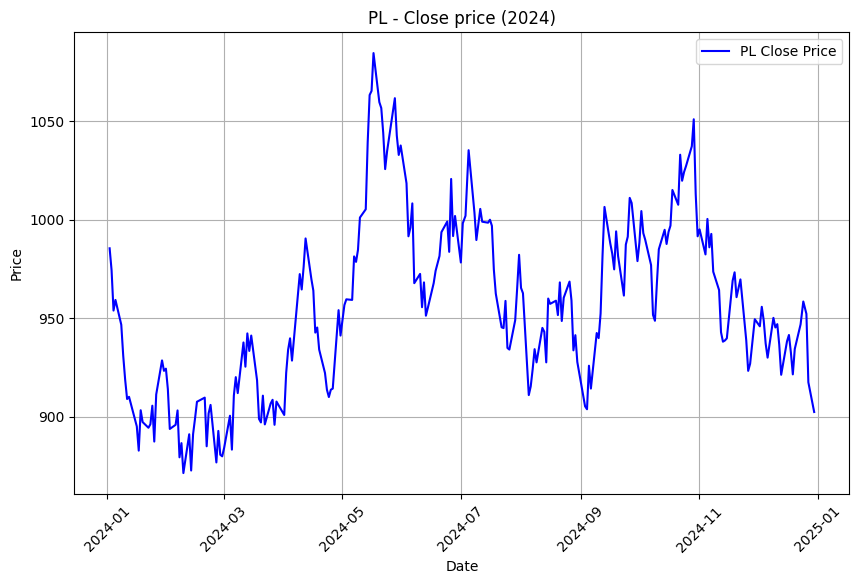

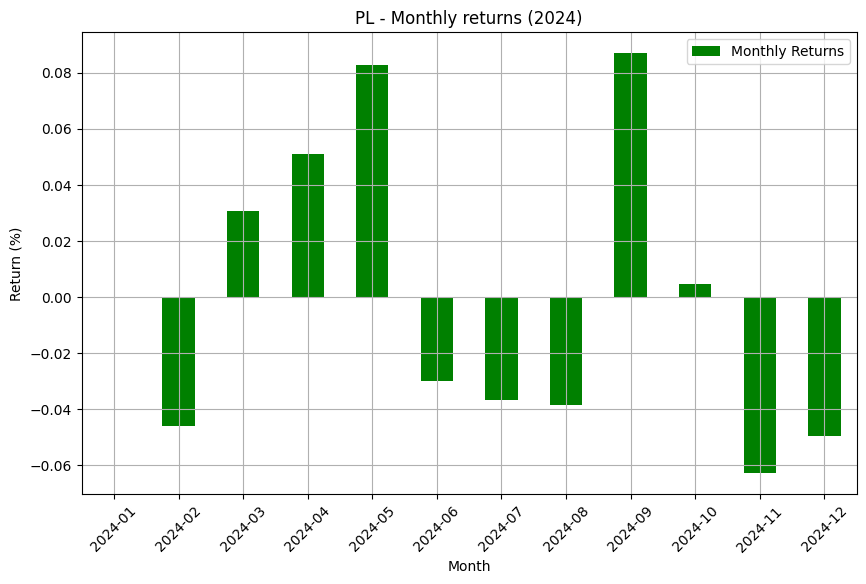

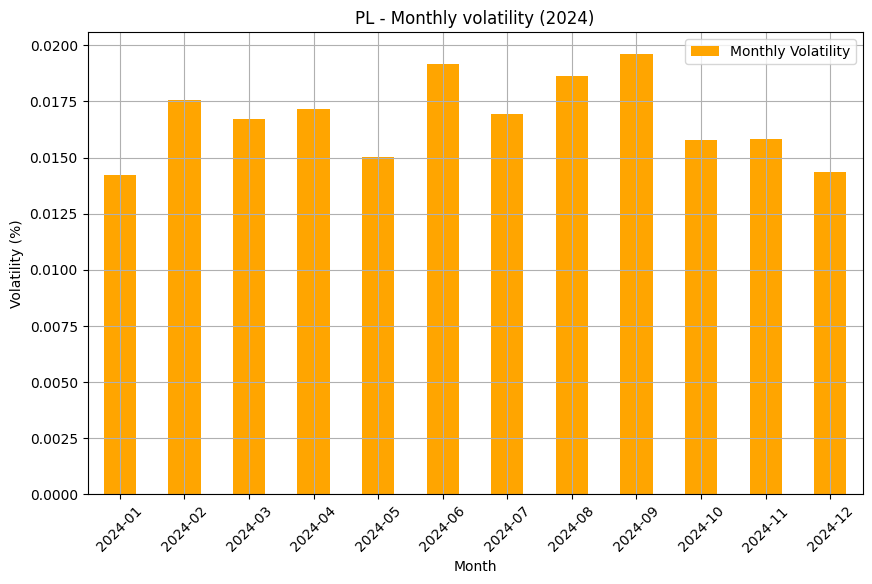

‚úÖ Donn√©es enregistr√©es dans 'PL_historical_data.csv'.


In [6]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Define the analysis period
start_date = "2024-01-01"
end_date = "2024-12-31"

start_timestamp = int(pd.Timestamp(start_date).timestamp())  # Start date as UNIX timestamp
end_timestamp = int(pd.Timestamp(end_date).timestamp())      # End date as UNIX timestamp

# Yahoo Finance ticker for Platinum
PL_ticker = "PL=F"

def fetch_data(ticker, start_timestamp, end_timestamp):
    """Fetches daily closing prices for a given asset"""
    print(f"üîÑ Fetching data for {ticker}...")

    url = f"https://query2.finance.yahoo.com/v8/finance/chart/{ticker}?period1={start_timestamp}&period2={end_timestamp}&interval=1d"
    
    try:
        response = requests.get(url, headers={"User-Agent": "Mozilla/5.0"})
        data = response.json()

        timestamps = data["chart"]["result"][0]["timestamp"]
        prices = data["chart"]["result"][0]["indicators"]["quote"][0]["close"]

        # Convert timestamps to DatetimeIndex
        dates = pd.to_datetime(timestamps, unit="s")
        price_series = pd.Series(prices, index=dates)

        print(f"‚úÖ Data successfully fetched for {ticker}.")
        return price_series

    except Exception as e:
        print(f"‚ùå Error while fetching data for {ticker}: {e}")
        return None

# Fetch Platinum data
PL_prices = fetch_data(PL_ticker, start_timestamp, end_timestamp)

if PL_prices is not None:
    # Convert to DataFrame and ensure DatetimeIndex
    PL_df = pd.DataFrame(PL_prices, columns=["Close"])
    PL_df.index = pd.to_datetime(PL_df.index)
    PL_df.index.name = "Date"

    # Calculate daily returns
    PL_df["Daily Return"] = PL_df["Close"].pct_change()

    # Calculate monthly returns and volatility
    monthly_returns = PL_df["Close"].resample("ME").ffill().pct_change()
    monthly_volatility = PL_df["Daily Return"].resample("ME").std()

    # Calculate annual return and volatility
    annual_return = PL_df["Close"].iloc[-1] / PL_df["Close"].iloc[0] - 1
    annual_volatility = PL_df["Daily Return"].std() * (252**0.5)  # Approx. 252 trading days/year

    # Display results
    print("\nüìä Platinum (PL=F) Performance Statistics")
    print(f"üìà Annual Return: {annual_return:.2%}")
    print(f"üìâ Annual Volatility: {annual_volatility:.2%}")

    # üìå Plot 1: Closing price
    plt.figure(figsize=(10, 6))
    plt.plot(PL_df.index, PL_df["Close"], label="Platinum Close Price", color="blue")
    plt.title("Platinum - Closing Price (2024)")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()

    # üìå Plot 2: Monthly returns
    plt.figure(figsize=(10, 6))
    monthly_returns.index = monthly_returns.index.strftime('%Y-%m')
    monthly_returns.plot(kind='bar', color="green", label="Monthly Returns")
    plt.title("Platinum - Monthly Returns (2024)")
    plt.xlabel("Month")
    plt.ylabel("Return (%)")
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()

    # üìå Plot 3: Monthly volatility
    plt.figure(figsize=(10, 6))
    monthly_volatility.index = monthly_volatility.index.strftime('%Y-%m')
    monthly_volatility.plot(kind='bar', color="orange", label="Monthly Volatility")
    plt.title("Platinum - Monthly Volatility (2024)")
    plt.xlabel("Month")
    plt.ylabel("Volatility (%)")
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()

    # Save data to CSV
    PL_df.to_csv("Platinum_historical_data.csv")
    print("‚úÖ Data saved to 'Platinum_historical_data.csv'.")

else:
    print("‚ö†Ô∏è No data available for Platinum.")

üîÑ R√©cup√©ration des donn√©es pour LMT...
‚úÖ Donn√©es r√©cup√©r√©es pour LMT.

üìä Statistiques de Lockheed Martin (LMT)
üìà Rendement Annuel : 5.97%
üìâ Volatilit√© Annuelle : 17.12%


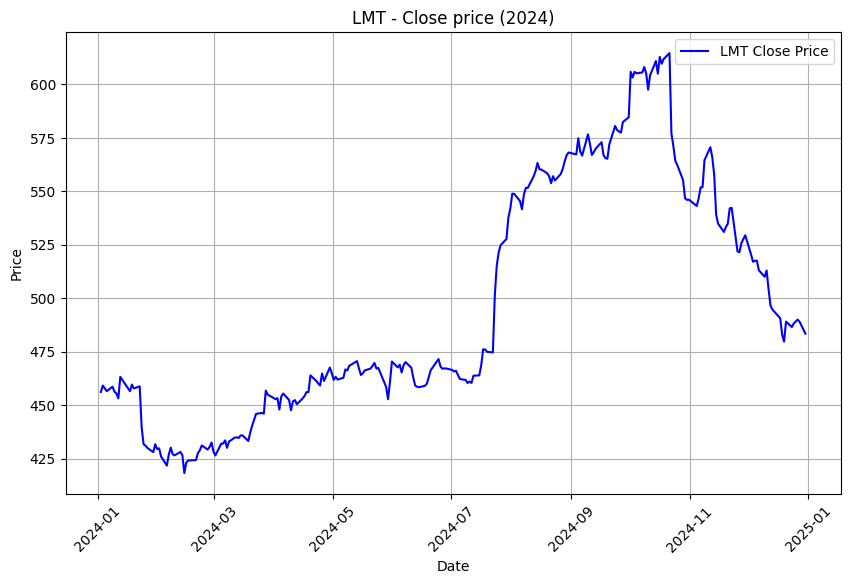

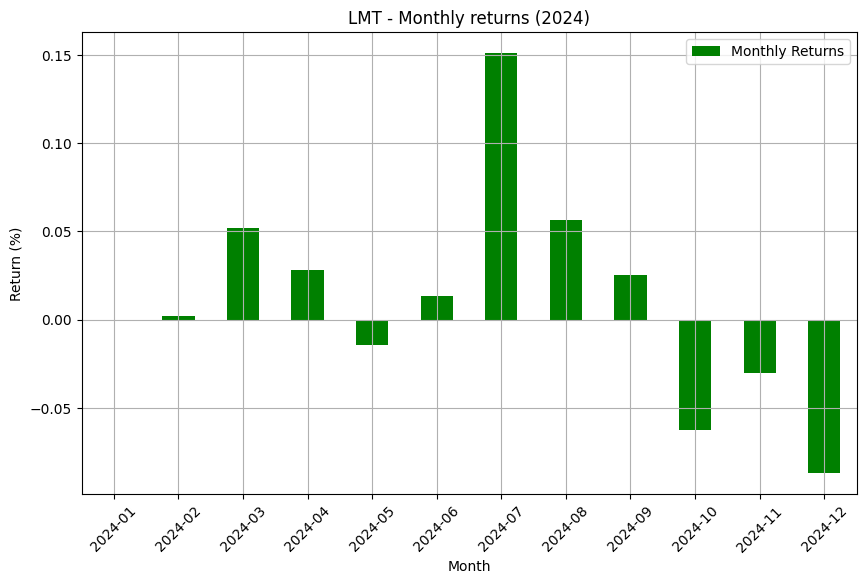

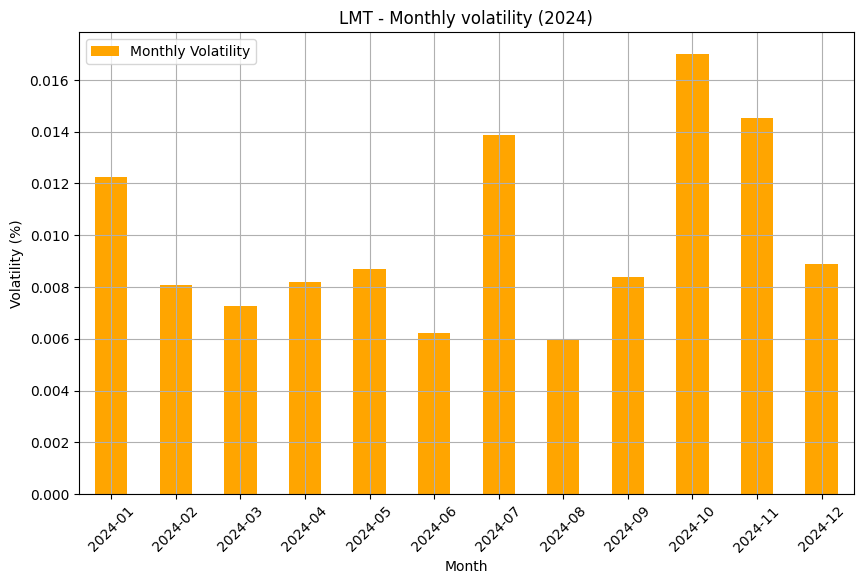

‚úÖ Donn√©es enregistr√©es dans 'LMT_historical_data.csv'.


In [3]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Define the analysis period
start_date = "2024-01-01"
end_date = "2024-12-31"

start_timestamp = int(pd.Timestamp(start_date).timestamp())  # Start date as UNIX timestamp
end_timestamp = int(pd.Timestamp(end_date).timestamp())      # End date as UNIX timestamp

# Yahoo Finance ticker for Lockheed Martin
LMT_ticker = "LMT"

def fetch_data(ticker, start_timestamp, end_timestamp):
    """Fetches daily closing prices for a given asset"""
    print(f"üîÑ Fetching data for {ticker}...")

    url = f"https://query2.finance.yahoo.com/v8/finance/chart/{ticker}?period1={start_timestamp}&period2={end_timestamp}&interval=1d"
    
    try:
        response = requests.get(url, headers={"User-Agent": "Mozilla/5.0"})
        data = response.json()

        timestamps = data["chart"]["result"][0]["timestamp"]
        prices = data["chart"]["result"][0]["indicators"]["quote"][0]["close"]

        # Convert timestamps to DatetimeIndex
        dates = pd.to_datetime(timestamps, unit="s")
        price_series = pd.Series(prices, index=dates)

        print(f"‚úÖ Data successfully fetched for {ticker}.")
        return price_series

    except Exception as e:
        print(f"‚ùå Error fetching data for {ticker}: {e}")
        return None

# Fetch LMT data
LMT_prices = fetch_data(LMT_ticker, start_timestamp, end_timestamp)

if LMT_prices is not None:
    # Convert to DataFrame and ensure DatetimeIndex
    LMT_df = pd.DataFrame(LMT_prices, columns=["Close"])
    LMT_df.index = pd.to_datetime(LMT_df.index)
    LMT_df.index.name = "Date"

    # Calculate daily returns
    LMT_df["Daily Return"] = LMT_df["Close"].pct_change()

    # Calculate monthly returns and volatility
    monthly_returns = LMT_df["Close"].resample("ME").ffill().pct_change()
    monthly_volatility = LMT_df["Daily Return"].resample("ME").std()

    # Calculate annual return and volatility
    annual_return = LMT_df["Close"].iloc[-1] / LMT_df["Close"].iloc[0] - 1
    annual_volatility = LMT_df["Daily Return"].std() * (252**0.5)  # Approx. 252 trading days/year

    # Display results
    print("\nüìä Lockheed Martin (LMT) Performance Statistics")
    print(f"üìà Annual Return: {annual_return:.2%}")
    print(f"üìâ Annual Volatility: {annual_volatility:.2%}")

    # üìå Plot 1: Closing price
    plt.figure(figsize=(10, 6))
    plt.plot(LMT_df.index, LMT_df["Close"], label="LMT Close Price", color="blue")
    plt.title("Lockheed Martin - Closing Price (2024)")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()

    # üìå Plot 2: Monthly returns
    plt.figure(figsize=(10, 6))
    monthly_returns.index = monthly_returns.index.strftime('%Y-%m')
    monthly_returns.plot(kind='bar', color="green", label="Monthly Returns")
    plt.title("Lockheed Martin - Monthly Returns (2024)")
    plt.xlabel("Month")
    plt.ylabel("Return (%)")
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()

    # üìå Plot 3: Monthly volatility
    plt.figure(figsize=(10, 6))
    monthly_volatility.index = monthly_volatility.index.strftime('%Y-%m')
    monthly_volatility.plot(kind='bar', color="orange", label="Monthly Volatility")
    plt.title("Lockheed Martin - Monthly Volatility (2024)")
    plt.xlabel("Month")
    plt.ylabel("Volatility (%)")
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()

    # Save data to CSV
    LMT_df.to_csv("LMT_historical_data.csv")
    print("‚úÖ Data saved to 'LMT_historical_data.csv'.")

else:
    print("‚ö†Ô∏è No data available for LMT.")

üîÑ R√©cup√©ration des donn√©es pour ^FVX...
‚úÖ Donn√©es r√©cup√©r√©es pour ^FVX.

üìä Statistiques de FVX
üìà Rendement Annuel : 11.31%
üìâ Volatilit√© Annuelle : 23.87%


/var/folders/23/p01lnkd12477bfyr7h43lzpr0000gn/T/ipykernel_36647/879238628.py:49: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  FVX_df["Daily Return"] = FVX_df["Close"].pct_change()
/var/folders/23/p01lnkd12477bfyr7h43lzpr0000gn/T/ipykernel_36647/879238628.py:52: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  monthly_returns = FVX_df["Close"].resample("ME").ffill().pct_change()


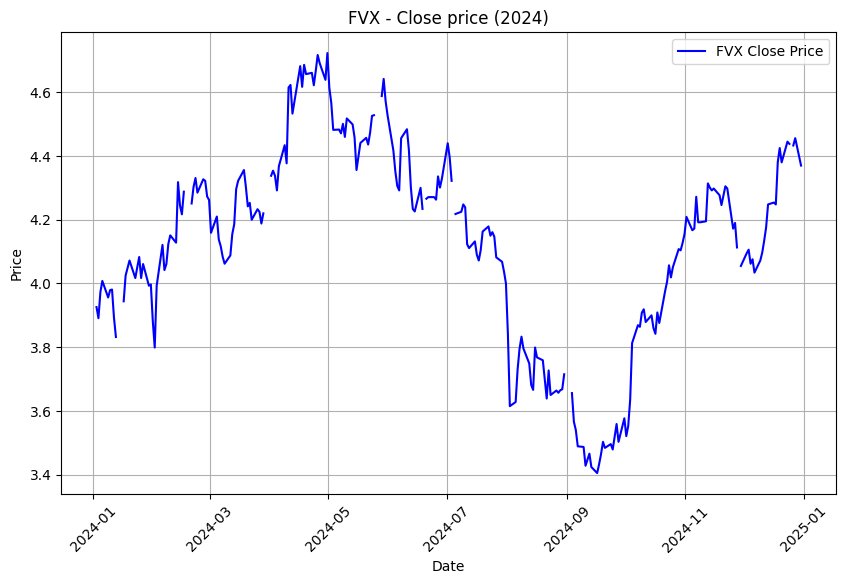

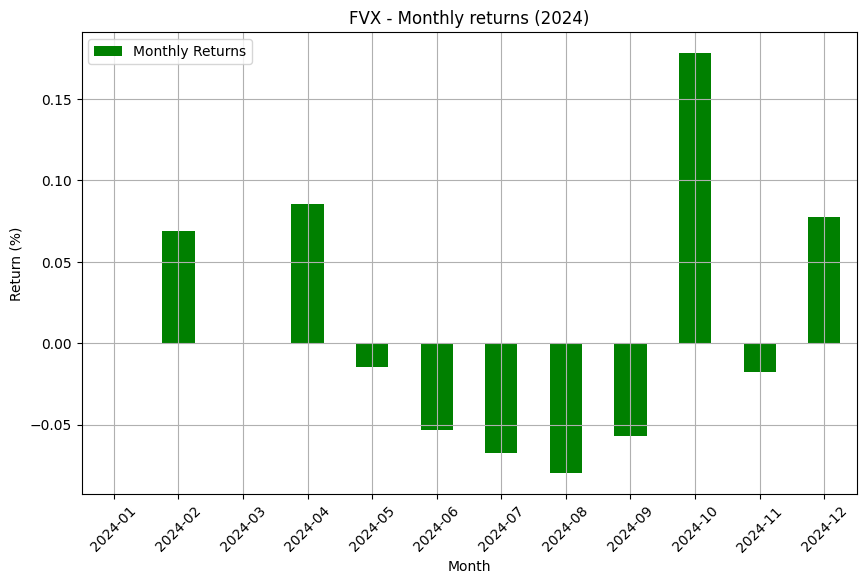

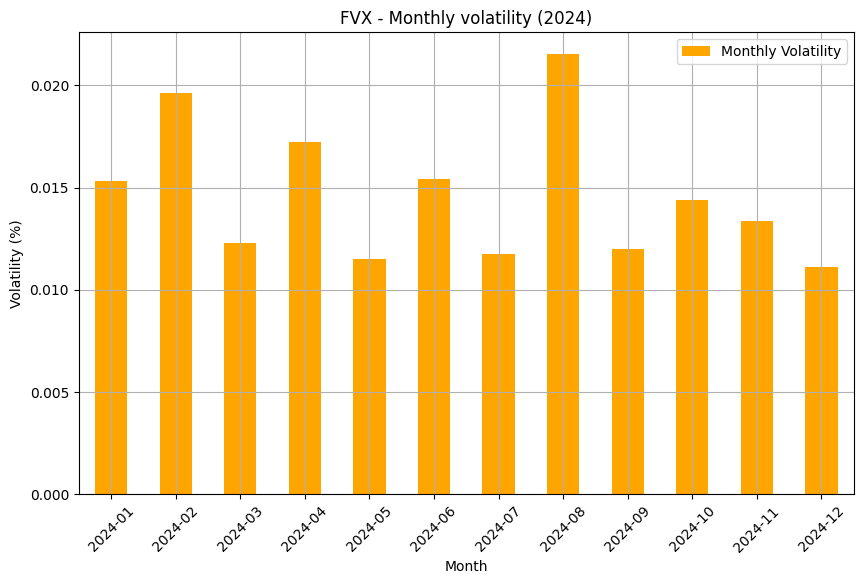

‚úÖ Donn√©es enregistr√©es dans 'FVX_historical_data.csv'.


In [5]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Define the analysis period
start_date = "2024-01-01"
end_date = "2024-12-31"

start_timestamp = int(pd.Timestamp(start_date).timestamp())  # Start date as UNIX timestamp
end_timestamp = int(pd.Timestamp(end_date).timestamp())      # End date as UNIX timestamp

# Yahoo Finance ticker for 5-Year Treasury Yield (^FVX)
FVX_ticker = "^FVX"

def fetch_data(ticker, start_timestamp, end_timestamp):
    """Fetches daily closing prices for a given asset"""
    print(f"üîÑ Fetching data for {ticker}...")

    url = f"https://query2.finance.yahoo.com/v8/finance/chart/{ticker}?period1={start_timestamp}&period2={end_timestamp}&interval=1d"
    
    try:
        response = requests.get(url, headers={"User-Agent": "Mozilla/5.0"})
        data = response.json()

        timestamps = data["chart"]["result"][0]["timestamp"]
        prices = data["chart"]["result"][0]["indicators"]["quote"][0]["close"]

        # Convert timestamps to DatetimeIndex
        dates = pd.to_datetime(timestamps, unit="s")
        price_series = pd.Series(prices, index=dates)

        print(f"‚úÖ Data successfully fetched for {ticker}.")
        return price_series

    except Exception as e:
        print(f"‚ùå Error fetching data for {ticker}: {e}")
        return None

# Fetch FVX data
FVX_prices = fetch_data(FVX_ticker, start_timestamp, end_timestamp)

if FVX_prices is not None:
    # Convert to DataFrame and ensure DatetimeIndex
    FVX_df = pd.DataFrame(FVX_prices, columns=["Close"])
    FVX_df.index = pd.to_datetime(FVX_df.index)
    FVX_df.index.name = "Date"

    # Calculate daily returns
    FVX_df["Daily Return"] = FVX_df["Close"].pct_change()

    # Calculate monthly returns and volatility
    monthly_returns = FVX_df["Close"].resample("ME").ffill().pct_change()
    monthly_volatility = FVX_df["Daily Return"].resample("ME").std()

    # Calculate annual return and volatility
    annual_return = FVX_df["Close"].iloc[-1] / FVX_df["Close"].iloc[0] - 1
    annual_volatility = FVX_df["Daily Return"].std() * (252**0.5)  # Approx. 252 trading days/year

    # Display results
    print("\nüìä 5-Year Treasury Yield (^FVX) Performance Statistics")
    print(f"üìà Annual Return: {annual_return:.2%}")
    print(f"üìâ Annual Volatility: {annual_volatility:.2%}")

    # üìå Plot 1: Closing price
    plt.figure(figsize=(10, 6))
    plt.plot(FVX_df.index, FVX_df["Close"], label="^FVX Close Price", color="blue")
    plt.title("^FVX - Closing Price (2024)")
    plt.xlabel("Date")
    plt.ylabel("Yield (%)")
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()

    # üìå Plot 2: Monthly returns
    plt.figure(figsize=(10, 6))
    monthly_returns.index = monthly_returns.index.strftime('%Y-%m')
    monthly_returns.plot(kind='bar', color="green", label="Monthly Returns")
    plt.title("^FVX - Monthly Returns (2024)")
    plt.xlabel("Month")
    plt.ylabel("Return (%)")
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()

    # üìå Plot 3: Monthly volatility
    plt.figure(figsize=(10, 6))
    monthly_volatility.index = monthly_volatility.index.strftime('%Y-%m')
    monthly_volatility.plot(kind='bar', color="orange", label="Monthly Volatility")
    plt.title("^FVX - Monthly Volatility (2024)")
    plt.xlabel("Month")
    plt.ylabel("Volatility (%)")
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()

    # Save data to CSV
    FVX_df.to_csv("FVX_historical_data.csv")
    print("‚úÖ Data saved to 'FVX_historical_data.csv'.")

else:
    print("‚ö†Ô∏è No data available for ^FVX.")

In [6]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


Optimal weights for each asset:
Palo Alto Networks: 5.00%
Crowd Strike: 15.00%
Nvidia: 5.00%
Palantir: 5.00%
Lockheed Martin: 20.00%
EUR/USD Futures: 20.00%
Swiss Franc: 5.00%
Platinium: 5.00%
US Treasury Bond (5 years): 20.00%

Annual portfolio return: 107.54%
Annual portfolio volatility: 49.99%
Sharpe ratio: 2.05
Expected return over 60 days: 25.61%
Expected volatility over 60 days: 387.20%


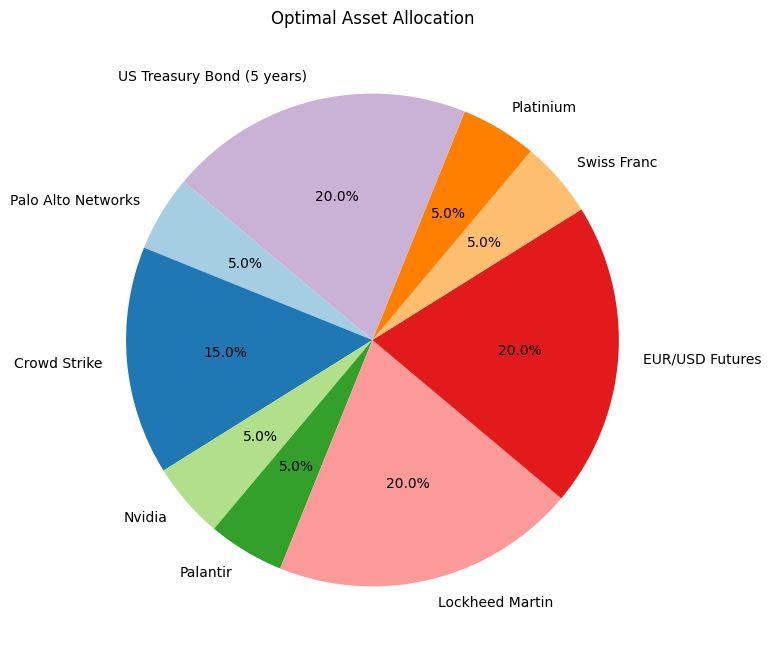

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Load historical asset price data from CSV
price_data = pd.read_csv("historical_prices_cleaned_2.csv", index_col=0, parse_dates=True)

# Calculate daily returns
returns = price_data.pct_change().dropna()

# Calculate annual returns (annualize by multiplying by 252 trading days)
annual_returns = returns.mean() * 252

# Calculate annual volatility (annualize by multiplying the standard deviation by the square root of 252)
annual_volatility = returns.std() * np.sqrt(252)

# Covariance matrix of returns (annualized)
cov_matrix = returns.cov() * 252  # Annualizing covariance

# Function to calculate portfolio performance (return and volatility)
def portfolio_performance(weights, returns, cov_matrix):
    portfolio_return = np.dot(weights, annual_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_volatility

# Function to maximize the Sharpe ratio
def sharpe_ratio(weights, returns, cov_matrix, risk_free_rate=0.05):
    portfolio_return, portfolio_volatility = portfolio_performance(weights, returns, cov_matrix)
    return -(portfolio_return - risk_free_rate) / portfolio_volatility  # Negative for maximization

# Initialize the weights (evenly distributed among assets)
num_assets = len(annual_returns)
initial_weights = np.ones(num_assets) / num_assets

# Bounds for weights (each asset must have between 0% and 20% allocation)
bounds = [(0.05, 0.2)] * num_assets

# Constraints: sum of weights must equal 1
constraints = [{"type": "eq", "fun": lambda w: np.sum(w) - 1}]

# Optimization to find the optimal allocation
result = minimize(
    sharpe_ratio,
    initial_weights,
    args=(returns, cov_matrix),
    method="SLSQP",
    bounds=bounds,
    constraints=constraints
)

# Optimal weights
optimal_weights = result.x

# Performance of the optimized portfolio
optimal_return, optimal_volatility = portfolio_performance(optimal_weights, returns, cov_matrix)
optimal_sharpe = (optimal_return - 0.05) / optimal_volatility  # Using a risk-free rate of 5%

# Calculate expected return and volatility for the portfolio over 60 days
expected_60d_return = optimal_return / 252 * 60  # Expected return over 60 days
expected_60d_volatility = optimal_volatility * np.sqrt(60)  # Expected volatility over 60 days

# Print results for the professor
print("Optimal weights for each asset:")
for i, asset in enumerate(price_data.columns):
    print(f"{asset}: {optimal_weights[i]*100:.2f}%")

print(f"\nAnnual portfolio return: {optimal_return*100:.2f}%")
print(f"Annual portfolio volatility: {optimal_volatility*100:.2f}%")
print(f"Sharpe ratio: {optimal_sharpe:.2f}")
print(f"Expected return over 60 days: {expected_60d_return*100:.2f}%")
print(f"Expected volatility over 60 days: {expected_60d_volatility*100:.2f}%")

# Plot the optimal asset allocation (Pie chart)
plt.figure(figsize=(8, 8))
plt.pie(optimal_weights, labels=price_data.columns, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Optimal Asset Allocation")
plt.show()

In [3]:
import pandas as pd
import numpy as np
import requests
import time
import matplotlib.pyplot as plt

# List of assets and their Yahoo Finance tickers
tickers = {
    "Palo Alto Networks": "PANW",
    "Crowd Strike": "CRWD",
    "Nvidia": "NVDA",
    "Palantir": "PLTR",
    "Lockheed Martin": "LMT",
    "EUR/USD Futures": "EURUSD=X",
    "Swiss Franc": "CHF=X",
    "Platinum": "PL=F",
    "US Treasury Bond (5 years)": "^FVX",
}

# Define the time period
start_date = "2025-04-01"
end_date = pd.Timestamp.today().strftime("%Y-%m-%d")  # End date set to today automatically

start_timestamp = int(pd.Timestamp(start_date).timestamp())  # Start as UNIX timestamp
end_timestamp = int(pd.Timestamp(end_date).timestamp())      # End as UNIX timestamp

# Function to fetch closing price data
def fetch_all_data(tickers, start_timestamp, end_timestamp):
    price_data = {}
    for name, ticker in tickers.items():
        print(f"üîÑ Fetching data for {name} ({ticker})...")
        url = f"https://query2.finance.yahoo.com/v8/finance/chart/{ticker}?period1={start_timestamp}&period2={end_timestamp}&interval=1d"
        
        try:
            response = requests.get(url, headers={"User-Agent": "Mozilla/5.0"})
            data = response.json()

            timestamps = data["chart"]["result"][0]["timestamp"]
            prices = data["chart"]["result"][0]["indicators"]["quote"][0]["close"]

            # Convert timestamps to dates
            dates = pd.to_datetime(timestamps, unit="s").date
            price_data[name] = pd.Series(prices, index=dates)

            print(f"‚úÖ Data retrieved for {name}.")
        except Exception as e:
            print(f"‚ùå Error retrieving data for {name}: {e}")
            price_data[name] = None
    
    return price_data

# Fetch all data
price_data = fetch_all_data(tickers, start_timestamp, end_timestamp)

# Transform data into a DataFrame
price_df = pd.DataFrame(price_data)

# Remove duplicates and keep one row per day
price_df = price_df.groupby(price_df.index).last()

# Forward fill missing data
price_df.fillna(method="ffill", inplace=True)

# Save cleaned data to CSV
price_df.to_csv("historical_prices_cleaned.csv", index=True)
print("üìä ‚úÖ Cleaned historical prices saved to 'historical_prices_cleaned.csv'.")

# Load the cleaned data
price_df = pd.read_csv("historical_prices_cleaned.csv", index_col=0, parse_dates=True)

# Initial asset allocations
initial_allocations = {
    "Palo Alto Networks": 0.05,
    "Crowd Strike": 0.05,
    "Nvidia": 0.05, 
    "Palantir": 0.2,
    "Lockheed Martin": 0.2,
    "EUR/USD Futures": 0.2,
    "Swiss Franc": 0.05,
    "Platinum": 0.05,
    "US Treasury Bond (5 years)": 0.2,
}

# Total portfolio value
total_investment = 10_000_000  # üí∞ Initial capital

# Function to generate portfolio tracking CSV
def generate_portfolio_csv(price_df, initial_allocations, total_investment):
    reference_prices = {}  # Reference prices for contribution calculations
    portfolio_data = []    # List to store portfolio data

    for date, row in price_df.iterrows():
        print(f"üìÖ Processing data for {date.strftime('%Y-%m-%d')}")
        day_data = []
        portfolio_value = 0

        for asset, allocation in initial_allocations.items():
            current_price = row[asset] if asset in row and not pd.isna(row[asset]) else None

            if current_price is not None:
                if asset not in reference_prices:
                    reference_prices[asset] = current_price

                investment = allocation * total_investment
                contribution = investment * (current_price / reference_prices[asset])
                portfolio_value += contribution

                day_data.append([
                    asset,
                    date.strftime('%Y-%m-%d'),
                    current_price,
                    allocation * 100,
                    investment,
                    contribution
                ])
            else:
                day_data.append([
                    asset,
                    date.strftime('%Y-%m-%d'),
                    None, None, None, None
                ])

        # Add total portfolio value for the day
        day_data.append(["Portfolio Value", date.strftime('%Y-%m-%d'), None, None, None, portfolio_value])
        portfolio_data.extend(day_data)

    # Save portfolio tracking to CSV
    columns = ["Asset", "Date", "Close Price", "Allocation (%)", "Investment (USD)", "Contribution to Portfolio"]
    portfolio_df = pd.DataFrame(portfolio_data, columns=columns)
    portfolio_df.to_csv("static_portfolio_tracking.csv", index=False)

    print("üìä ‚úÖ Portfolio tracking saved to 'static_portfolio_tracking.csv'")

# Run the portfolio tracking
generate_portfolio_csv(price_df, initial_allocations, total_investment)

üîÑ Fetching data for Palo Alto Networks (PANW)...
‚úÖ Data retrieved for Palo Alto Networks.
üîÑ Fetching data for Crowd Strike (CRWD)...
‚úÖ Data retrieved for Crowd Strike.
üîÑ Fetching data for Nvidia (NVDA)...
‚úÖ Data retrieved for Nvidia.
üîÑ Fetching data for Palantir (PLTR)...
‚úÖ Data retrieved for Palantir.
üîÑ Fetching data for Lockheed Martin (LMT)...
‚úÖ Data retrieved for Lockheed Martin.
üîÑ Fetching data for EUR/USD Futures (EURUSD=X)...
‚úÖ Data retrieved for EUR/USD Futures.
üîÑ Fetching data for Swiss Franc (CHF=X)...
‚úÖ Data retrieved for Swiss Franc.
üîÑ Fetching data for Platinum (PL=F)...
‚úÖ Data retrieved for Platinum.
üîÑ Fetching data for US Treasury Bond (5 years) (^FVX)...
‚úÖ Data retrieved for US Treasury Bond (5 years).
üìä ‚úÖ Cleaned historical prices saved to 'historical_prices_cleaned.csv'.
üìÖ Processing data for 2025-03-31
üìÖ Processing data for 2025-04-01
üìÖ Processing data for 2025-04-02
üìÖ Processing data for 2025-04-03
üìÖ P

/var/folders/23/p01lnkd12477bfyr7h43lzpr0000gn/T/ipykernel_38160/1151320666.py:62: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  price_df.fillna(method="ffill", inplace=True)


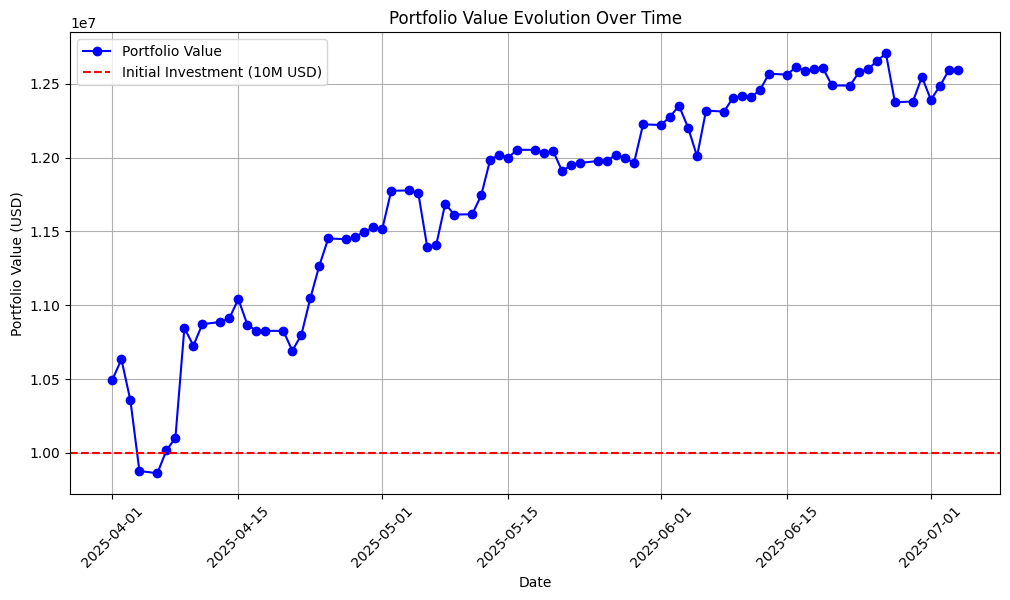

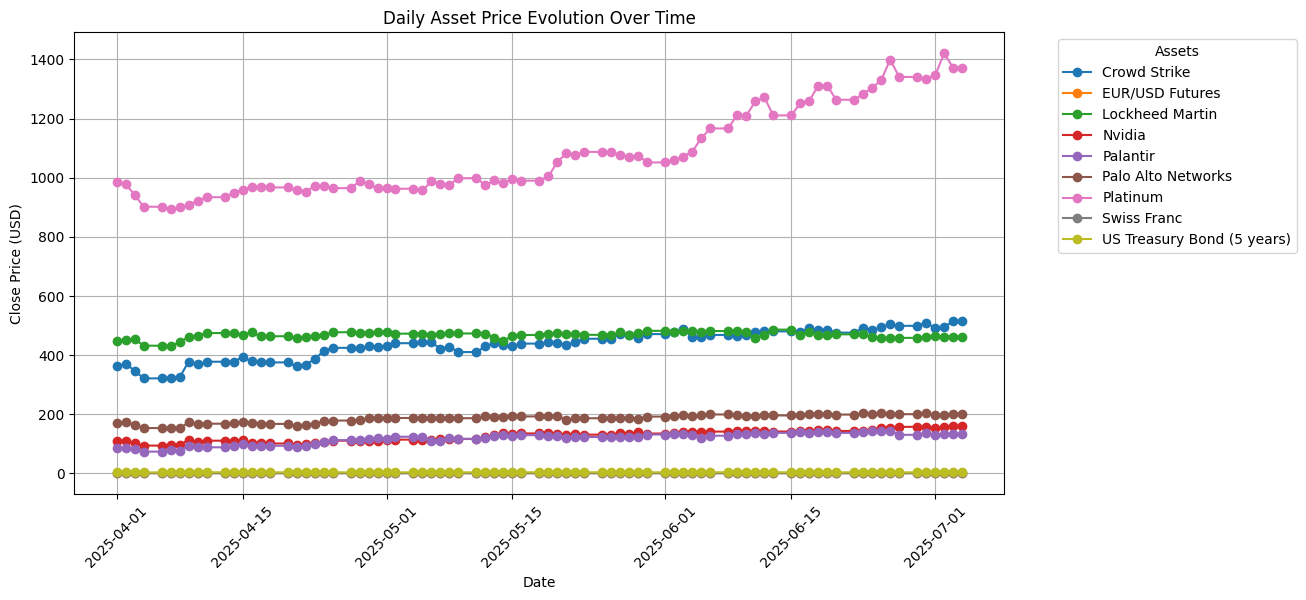

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def plot_portfolio_evolution(csv_filename):
    """Generate graphs for portfolio value and asset price evolution over time."""
    
    # Load data
    df = pd.read_csv(csv_filename)

    # Convert date column to datetime
    df["Date"] = pd.to_datetime(df["Date"])

    # Filter out rows before April 1st
    df = df[df["Date"] >= "2025-04-01"]

    # Filter out portfolio value rows
    portfolio_df = df[df["Asset"] == "Portfolio Value"].copy()
    asset_df = df[df["Asset"] != "Portfolio Value"].copy()

    # Convert allocation percentages and prices to numeric values
    asset_df["Allocation (%)"] = pd.to_numeric(asset_df["Allocation (%)"], errors="coerce")
    asset_df["Close Price"] = pd.to_numeric(asset_df["Close Price"], errors="coerce")

    # Convert investment values to numeric
    portfolio_df["Contribution to Portfolio"] = pd.to_numeric(portfolio_df["Contribution to Portfolio"], errors="coerce")

    ### **Plot Portfolio Value Evolution (Line Chart)**
    plt.figure(figsize=(12, 6))
    plt.plot(portfolio_df["Date"], portfolio_df["Contribution to Portfolio"], marker="o", linestyle="-", color="blue", label="Portfolio Value")
    
    # Adding a red horizontal line at y = 10,000,000 for the initial investment
    plt.axhline(y=10000000, color='red', linestyle='--', label='Initial Investment (10M USD)')
    
    plt.xlabel("Date")
    plt.ylabel("Portfolio Value (USD)")
    plt.title("Portfolio Value Evolution Over Time")
    plt.legend()
    plt.grid(True)

    # Format x-axis ticks with dates
    plt.xticks(rotation=45)
    plt.show()

    ### **Plot Asset Price Evolution (Single Line Chart for All Assets)**
    price_pivot = asset_df.pivot(index="Date", columns="Asset", values="Close Price")

    plt.figure(figsize=(12, 6))
    for column in price_pivot.columns:
        plt.plot(price_pivot.index, price_pivot[column], marker="o", linestyle="-", label=column)

    plt.xlabel("Date")
    plt.ylabel("Close Price (USD)")
    plt.title("Daily Asset Price Evolution Over Time")
    plt.legend(title="Assets", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.grid(True)

    plt.xticks(rotation=45)
    plt.show()


# Call the function using the latest generated CSV file
plot_portfolio_evolution("static_portfolio_tracking.csv")

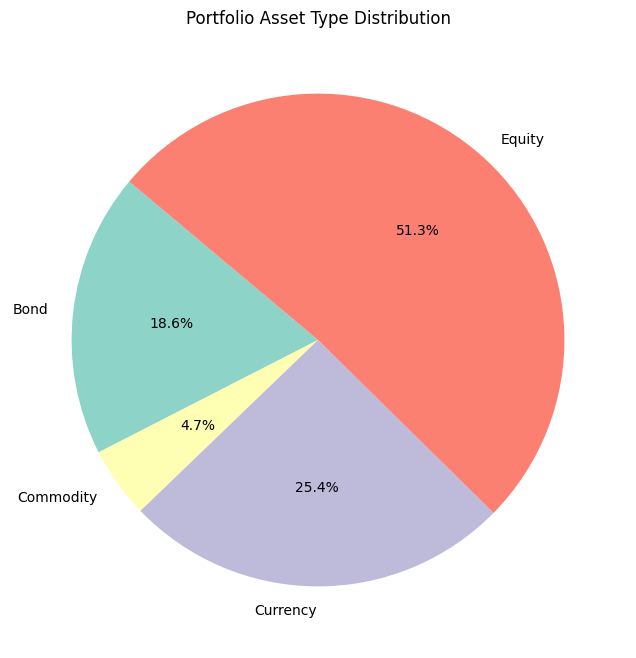

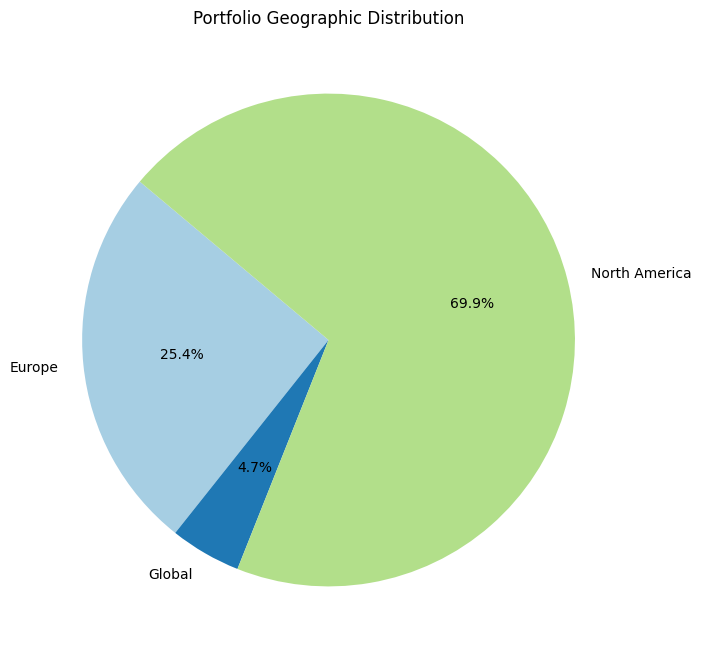

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_pie_charts(csv_filename, asset_types, asset_regions):
    """
    Generate two pie charts:
    1. Asset type distribution (Equities, Bonds, etc.).
    2. Geographic distribution of assets (North America, Europe, etc.).
    """
    # Load data
    df = pd.read_csv(csv_filename)

    # Filter out Portfolio Value rows
    asset_df = df[df["Asset"] != "Portfolio Value"].copy()

    # Convert Allocation (%) to numeric
    asset_df["Allocation (%)"] = pd.to_numeric(asset_df["Allocation (%)"], errors="coerce")

    ### Pie Chart 1: Asset Type Distribution
    asset_df["Type"] = asset_df["Asset"].map(asset_types)  # Map each asset to its type
    type_distribution = asset_df.groupby("Type")["Allocation (%)"].sum()

    plt.figure(figsize=(8, 8))
    plt.pie(
        type_distribution,
        labels=type_distribution.index,
        autopct="%1.1f%%",
        startangle=140,
        colors=plt.cm.Set3.colors,
    )
    plt.title("Portfolio Asset Type Distribution")
    plt.show()

    ### Pie Chart 2: Geographic Distribution
    asset_df["Region"] = asset_df["Asset"].map(asset_regions)  # Map each asset to its region
    region_distribution = asset_df.groupby("Region")["Allocation (%)"].sum()

    plt.figure(figsize=(8, 8))
    plt.pie(
        region_distribution,
        labels=region_distribution.index,
        autopct="%1.1f%%",
        startangle=140,
        colors=plt.cm.Paired.colors,
    )
    plt.title("Portfolio Geographic Distribution")
    plt.show()


# Define asset types (adjust based on your assets)
asset_types = {
    "Palo Alto Networks": "Equity",
    "Crowd Strike": "Equity",
    "Nvidia": "Equity",
    "Palantir": "Equity",
    "Lockheed Martin": "Equity",
    "EUR/USD Futures": "Currency",
    "Swiss Franc": "Currency",
    "Platinium": "Commodity",
    "US Treasury Bond (5 years)": "Bond",
}

# Define asset regions (adjust based on your assets)
asset_regions = {
    "Palo Alto Networks": "North America",
    "Crowd Strike": "North America",
    "Nvidia": "North America",
    "Palantir": "North America",
    "Lockheed Martin": "North America",
    "EUR/USD Futures": "Europe",
    "Swiss Franc": "Europe",
    "Platinium": "Global",
    "US Treasury Bond (5 years)": "North America",
}

# Call the function using the latest generated CSV file
plot_pie_charts("static_portfolio_tracking.csv", asset_types, asset_regions)

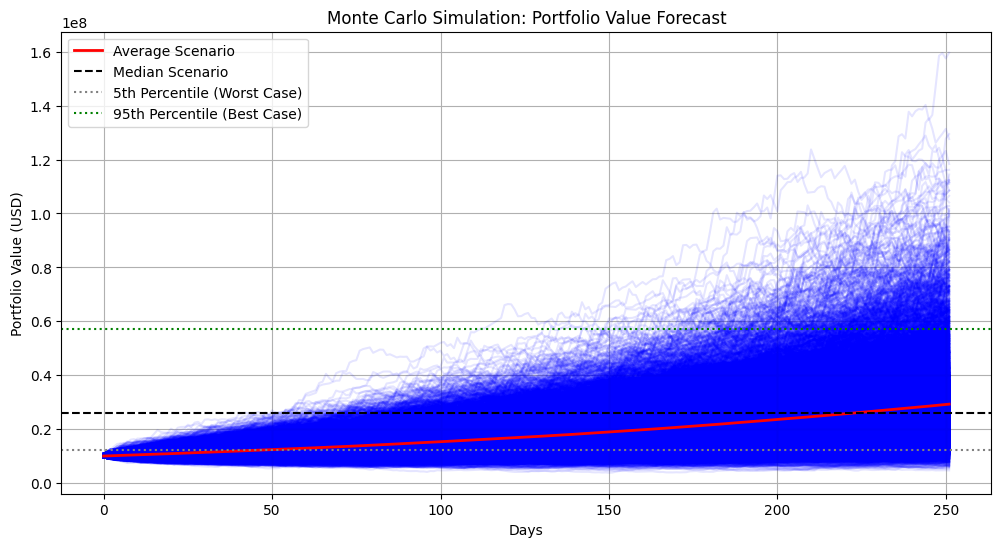


üìä Portfolio Value Forecast Summary (After 1 Year):
üî¥ Worst-case scenario (5th percentile): $12,146,488.86
üü† Conservative scenario (25th percentile): $19,155,169.10
‚ö™Ô∏è Median scenario (50th percentile): $26,119,469.90
üü¢ Optimistic scenario (75th percentile): $36,023,230.71
‚úÖ Best-case scenario (95th percentile): $57,219,373.82


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load historical price data
price_df = pd.read_csv("historical_prices_cleaned_2.csv", index_col=0, parse_dates=True)

# Define initial asset allocations and total investment based on your current strategy
initial_allocations = {
    "Palo Alto Networks": 0.05,
    "Crowd Strike": 0.15,
    "Nvidia": 0.05,
    "Palantir": 0.05,
    "Lockheed Martin": 0.20,
    "EUR/USD Futures": 0.20,
    "Swiss Franc": 0.05,
    "Platinium": 0.05,
    "US Treasury Bond (5 years)": 0.20,
}

total_investment = 10_000_000  # Initial portfolio value in USD
num_simulations = 10_000  # Number of Monte Carlo simulations
forecast_days = 252  # Forecasting period (1 year of trading days)

# Compute historical daily returns
returns_df = price_df.pct_change().dropna()

# Monte Carlo simulation
simulated_portfolios = np.zeros((num_simulations, forecast_days))

for i in range(num_simulations):
    # Generate random returns based on historical data
    simulated_returns = returns_df.sample(n=forecast_days, replace=True).values
    # Apply these returns to the initial investment
    simulated_growth = np.cumprod(1 + simulated_returns @ np.array(list(initial_allocations.values()))) * total_investment
    simulated_portfolios[i, :] = simulated_growth

# Plot the Monte Carlo forecast
plt.figure(figsize=(12, 6))
plt.plot(range(forecast_days), simulated_portfolios.T, alpha=0.1, color="blue")
plt.xlabel("Days")
plt.ylabel("Portfolio Value (USD)")
plt.title("Monte Carlo Simulation: Portfolio Value Forecast")
plt.grid(True)

# Add the mean projection line
mean_projection = simulated_portfolios.mean(axis=0)
plt.plot(range(forecast_days), mean_projection, color="red", label="Average Scenario", linewidth=2)

# Highlight percentile scenarios
percentiles = np.percentile(simulated_portfolios[:, -1], [5, 25, 50, 75, 95])
plt.axhline(percentiles[2], color="black", linestyle="--", label="Median Scenario")
plt.axhline(percentiles[0], color="gray", linestyle="dotted", label="5th Percentile (Worst Case)")
plt.axhline(percentiles[4], color="green", linestyle="dotted", label="95th Percentile (Best Case)")

plt.legend()
plt.show()

# Print summary of results
print("\nüìä Portfolio Value Forecast Summary (After 1 Year):")
print(f"üî¥ Worst-case scenario (5th percentile): ${percentiles[0]:,.2f}")
print(f"üü† Conservative scenario (25th percentile): ${percentiles[1]:,.2f}")
print(f"‚ö™Ô∏è Median scenario (50th percentile): ${percentiles[2]:,.2f}")
print(f"üü¢ Optimistic scenario (75th percentile): ${percentiles[3]:,.2f}")
print(f"‚úÖ Best-case scenario (95th percentile): ${percentiles[4]:,.2f}")